In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


from xgboost import XGBRegressor


from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pmdarima
import pmdarima as pm
from prophet import Prophet
import logging
import sys

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.4 MB/s eta 0:00:00


In [ ]:
import missingno as msn

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import skew, kurtosis

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
# Removing the 'Country Code' column from the DataFrame 'train'
train = train.drop(['Country Code'], axis="columns")
train.head()

,Country Name,Indicator,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Afghanistan,Access to electricity (% of population),4.446890831,9.294527054,14.13361645,18.9711647,23.81418228,28.66967201,33.54441833,38.44000244,42.4,48.27900696,42.7,43.22201891,69.1,68.0408783,89.5,71.5
1,Afghanistan,Agricultural land (% of land area),57.94581666,57.94734986,57.93968385,58.08380479,58.15126566,58.13440044,58.12366803,58.12980084,58.13286724,58.13286724,58.13440044,58.13133404,58.12980084,58.12366803,58.12366803,58.12366803
2,Afghanistan,"Annual freshwater withdrawals, total (% of int...",43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668
3,Afghanistan,Arable land (% of land area),11.77958696,11.77958696,11.77192095,11.91604189,11.98350275,11.96663754,11.94977232,11.94977232,11.94977232,11.94823912,11.94823912,11.94517272,11.94363951,11.93597351,11.91450869,11.90530948
4,Afghanistan,Forest area (% of land area),1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   3192 non-null   object
 1   Indicator      3192 non-null   object
 2   2000 [YR2000]  3192 non-null   object
 3   2001 [YR2001]  3192 non-null   object
 4   2002 [YR2002]  3192 non-null   object
 5   2003 [YR2003]  3192 non-null   object
 6   2004 [YR2004]  3192 non-null   object
 7   2005 [YR2005]  3192 non-null   object
 8   2006 [YR2006]  3192 non-null   object
 9   2007 [YR2007]  3192 non-null   object
 10  2008 [YR2008]  3192 non-null   object
 11  2009 [YR2009]  3192 non-null   object
 12  2010 [YR2010]  3192 non-null   object
 13  2011 [YR2011]  3192 non-null   object
 14  2012 [YR2012]  3192 non-null   object
 15  2013 [YR2013]  3192 non-null   object
 16  2014 [YR2014]  3192 non-null   object
 17  2015 [YR2015]  3192 non-null   object
dtypes: object(18)
memory usage: 

In [ ]:
test.head()

,Country Name,Indicator,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,Access to electricity (% of population),97.7,97.7,93.43087769,97.7,97.7
1,Afghanistan,Agricultural land (% of land area),58.12366803,58.12366803,58.27698818,58.27698818,58.74154823
2,Afghanistan,"Annual freshwater withdrawals, total (% of int...",43.01590668,43.01590668,43.01590668,43.01590668,43.01590668
3,Afghanistan,Arable land (% of land area),11.85011422,11.80411818,11.94977232,11.94057311,12.00343437
4,Afghanistan,Forest area (% of land area),1.852781994,1.852781994,1.852781994,1.852781994,1.852781994


In [ ]:
train.shape

(3192, 18)

In [ ]:
test.shape

(2926, 7)

# **Data Preprocessing**
---



###1. Converting these columns explicitly to numeric ensures that the data is in the correct format for numerical operations,

In [ ]:
def Converting_numeric_type(df):
  numerical_columns = df.columns[2:]
  df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors="coerce")
  return df

train = Converting_numeric_type(train)
test = Converting_numeric_type(test)

###2. Number of Duplicate Value in train dataset :

In [ ]:
train.duplicated().sum()

0

###3. Handling missing values :

* Visualizing missing values in the DataFrame 'train' :

<Figure size 2400x1500 with 0 Axes>

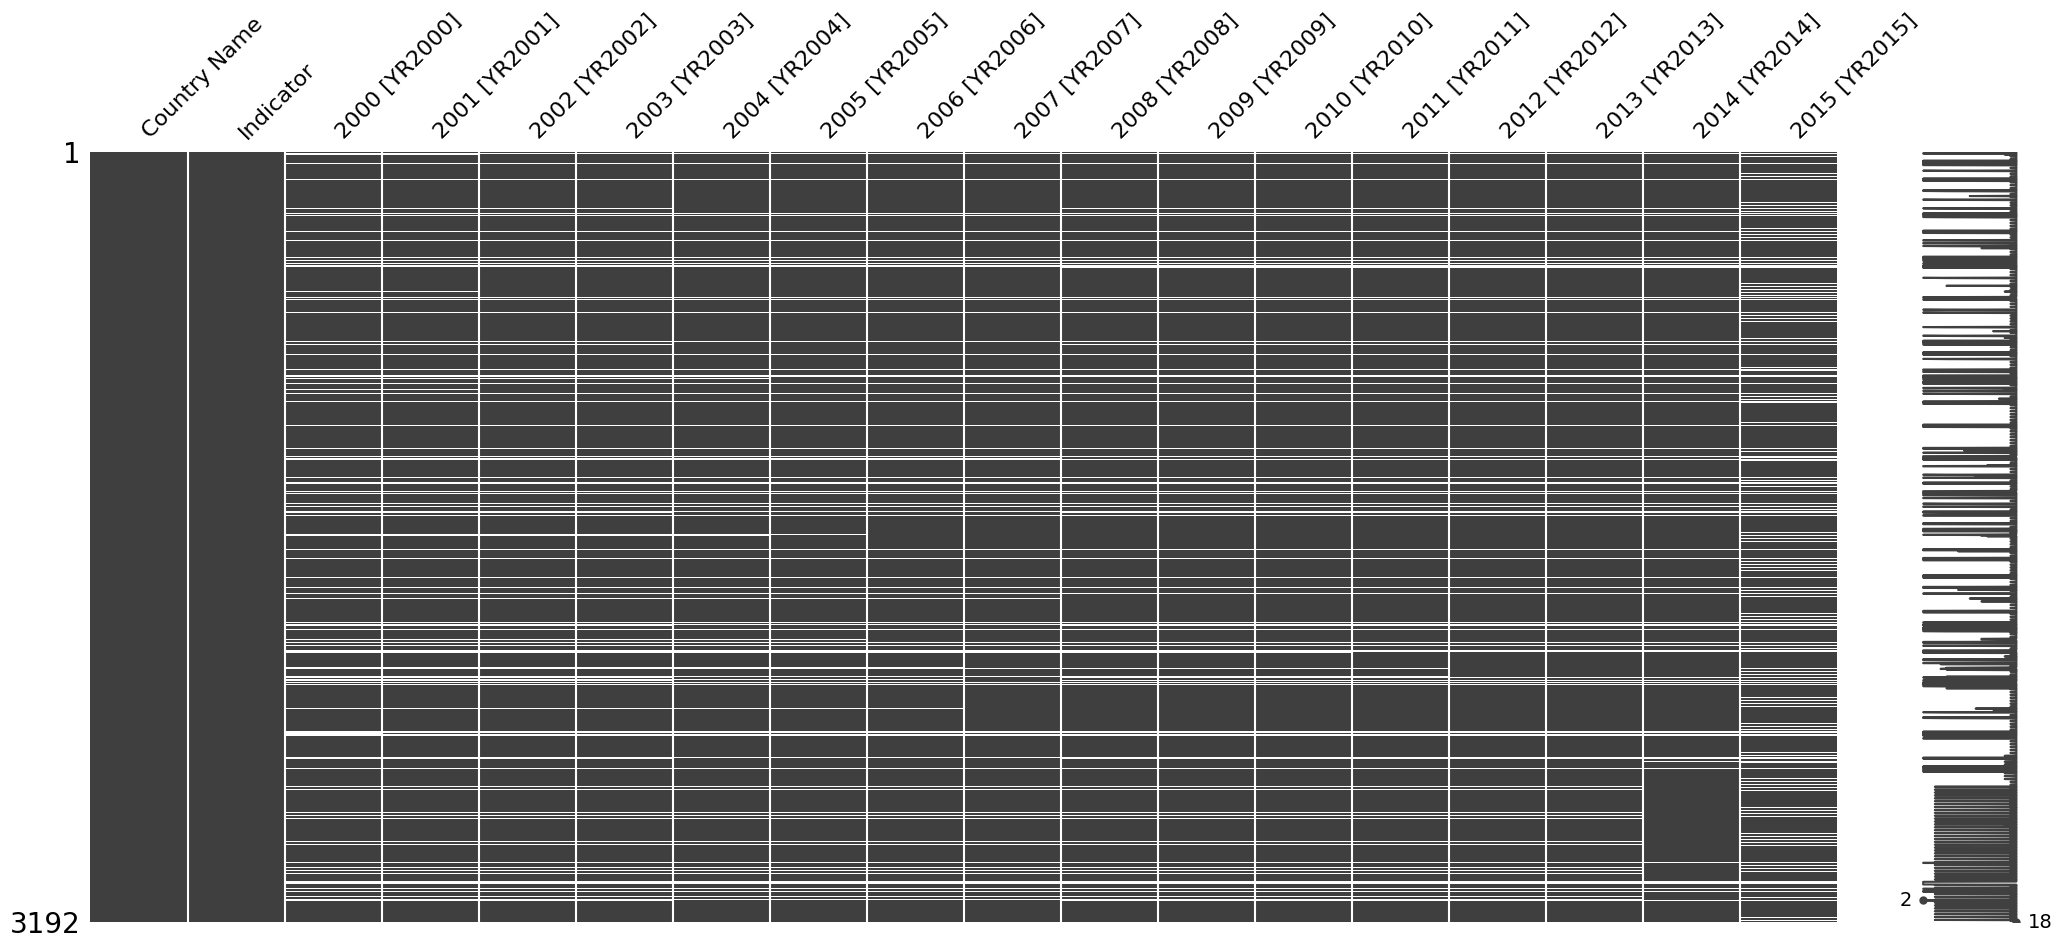

In [ ]:
plt.figure(figsize = (8, 5), dpi = 300)
msn.matrix(train)
plt.show()

<Figure size 2400x1500 with 0 Axes>

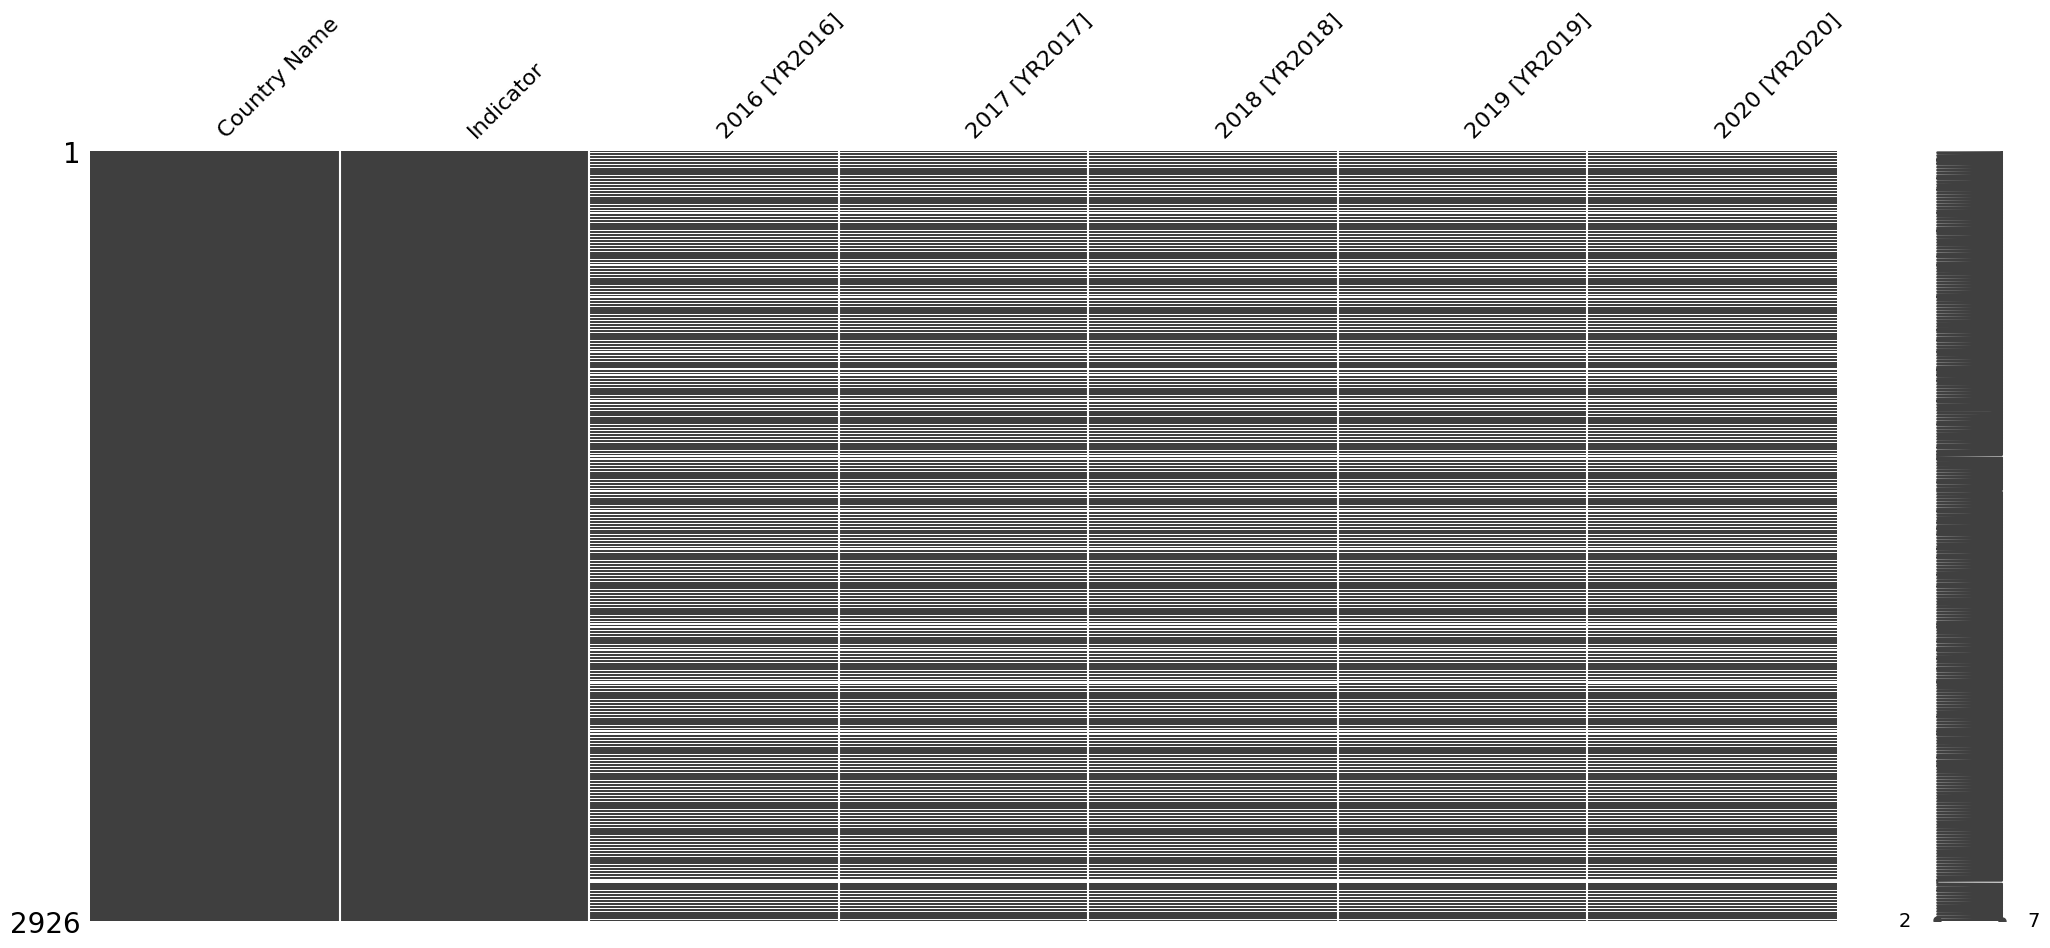

In [ ]:
plt.figure(figsize = (8, 5), dpi = 300)
msn.matrix(test)
plt.show()

* The fill_missing function is designed to fill missing values (NaN) in a DataFrame row with forward filling (or ffill), a common technique in time series and sequential data to propagate the last observed value forward. This strategy ensures that the imputed value is within the range of the existing data, reducing the risk of introducing outliers,

In [ ]:
def fill_missing(row):
  for i in range(len(row)):

    if i == 0 and pd.isnull(row[i]):
      min_value = np.min(row[1:])
      row[i] = min_value
    elif pd.isnull(row[i]):
      row[i] = row[i-1]
  return row

In [ ]:
train_numeric = train.iloc[:, 2:].copy()
train_cat = train.iloc[:, :2].copy()
train_numeric_ffill = train_numeric.apply(fill_missing, axis=1)
train = pd.concat([train_cat, train_numeric_ffill], axis="columns")

In [ ]:
test_numeric = test.iloc[:, 2:].copy()
test_cat = test.iloc[:, :2].copy()
test_numeric_ffill = test_numeric.apply(fill_missing, axis=1)
test = pd.concat([test_cat, test_numeric_ffill], axis="columns")

* For catagorical values, fill the missing values with median is beneficial :

In [ ]:
def Fill_missing_value_with_median(dataset):
    for indicator in dataset['Indicator'].unique():
        dataset[dataset['Indicator'] == indicator] = dataset[dataset['Indicator'] == indicator].fillna( dataset[dataset['Indicator'] == indicator].median(numeric_only=True))

    return dataset


#train_copy = train.copy()
#test_copy = test.copy()

train = Fill_missing_value_with_median(train)
test = Fill_missing_value_with_median(test)


In [ ]:
train.isna().sum()

Country Name     0
Indicator        0
2000 [YR2000]    0
2001 [YR2001]    0
2002 [YR2002]    0
2003 [YR2003]    0
2004 [YR2004]    0
2005 [YR2005]    0
2006 [YR2006]    0
2007 [YR2007]    0
2008 [YR2008]    0
2009 [YR2009]    0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
dtype: int64

In [ ]:
test.isna().sum()

Country Name       0
Indicator          0
2016 [YR2016]    266
2017 [YR2017]    266
2018 [YR2018]    266
2019 [YR2019]    266
2020 [YR2020]    266
dtype: int64

* We are using train dataset to fill the missing value of test dataset. For that, we are converting row to column :

In [ ]:
# Row Column Conversion
def Row_column_conversion(df):
  new_df = pd.DataFrame()

  # Iterate over unique country names in the 'Country Name' column
  for country in df['Country Name'].unique():
    country_df = df[df['Country Name'] == country]
    country_df = country_df.drop(['Country Name'], axis="columns")
    country_df = country_df.set_index("Indicator")

    # Transpose the DataFrame to swap rows and columns
    country_df = country_df.transpose()
    country_df['Country Name'] = country
    new_df = pd.concat([new_df, country_df], axis="rows")

  new_df.reset_index(inplace=True)
  new_df.rename(columns={"index": "Year"}, inplace=True)
  new_df['Year'] = new_df['Year'].apply(lambda x: int(x.split()[0]))
  new_df.columns = new_df.columns.rename(None)
  return new_df

In [ ]:
train1 = Row_column_conversion(train)
test1 = Row_column_conversion(test)
train1.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita),Country Name
0,2000,4.446891,57.945817,43.015907,11.779587,1.852782,1586.591120,985.730004,74.989094,44.99,1.443803,182.174037,0.055167,Afghanistan
1,2001,9.294527,57.947350,43.015907,11.779587,1.852782,1587.375364,1011.679617,72.811460,45.60,0.742517,182.174037,0.055293,Afghanistan
2,2002,14.133616,57.939684,43.015907,11.771921,1.852782,1649.718098,1034.410867,79.063971,37.83,6.449321,182.174037,0.066810,Afghanistan
3,2003,18.971165,58.083805,43.015907,11.916042,1.852782,1738.666619,1010.524231,70.249729,36.66,7.541019,199.643228,0.073005,Afghanistan
4,2004,23.814182,58.151266,43.015907,11.983503,1.852782,1841.168267,1121.869767,70.890841,44.24,3.933178,221.830531,0.054867,Afghanistan


In [ ]:
test1.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),Country Name
0,2016,97.700000,58.123668,43.015907,11.850114,1.852782,956.0,NaN,12.071958,19.92,2.581549,523.053012,Afghanistan
1,2017,97.700000,58.123668,43.015907,11.804118,1.852782,1021.0,NaN,12.560554,19.21,2.866492,526.140801,Afghanistan
2,2018,93.430878,58.276988,43.015907,11.949772,1.852782,1064.0,NaN,17.037001,17.96,2.885208,492.090632,Afghanistan
3,2019,97.700000,58.276988,43.015907,11.940573,1.852782,1084.0,NaN,16.246645,18.51,2.908529,497.741429,Afghanistan
4,2020,97.700000,58.741548,43.015907,12.003434,1.852782,1084.0,NaN,16.246645,17.58,3.134747,512.055098,Afghanistan


* We are using Arima to fill the missing value of test dataset :

In [ ]:
def Fill_test_dataset_missing_value_with_arima(train_dataset, test_dataset, columns):
  for country in train_dataset['Country Name'].unique():
    country_df = train_dataset[train_dataset['Country Name'] == country]

    for col in columns:
      data = country_df[col]

      if col == "Electric power consumption (kWh per capita)":
        arima_model = ARIMA(data, order=(5, 1, 0))
      elif col == "Energy use (kg of oil equivalent per capita)":
        arima_model = ARIMA(data, order=(5, 1, 0))
      else:
        arima_model = ARIMA(data, order=(5, 1, 0))

      results = arima_model.fit()
      forecast = results.forecast(steps=5).tolist()
      index_value = test_dataset[test_dataset['Country Name'] == country].index.tolist()
      test_dataset.loc[index_value, col] = forecast

  return test_dataset

In [ ]:
train1_copy = train1.copy()
test1_copy = test1.copy()
test2 = Fill_test_dataset_missing_value_with_arima(train1_copy, test1_copy,
                                                           ['Electric power consumption (kWh per capita)',
                                                             'Energy use (kg of oil equivalent per capita)',
                                                             'Renewable electricity output (% of total electricity output)'
                                                           ])

In [ ]:
test2.isna().sum()

Year                                                                  0
Access to electricity (% of population)                               0
Agricultural land (% of land area)                                    0
Annual freshwater withdrawals, total (% of internal resources)        0
Arable land (% of land area)                                          0
Forest area (% of land area)                                          0
Electric power consumption (kWh per capita)                           0
Energy use (kg of oil equivalent per capita)                          0
Renewable electricity output (% of total electricity output)          0
Renewable energy consumption (% of total final energy consumption)    0
Population growth (annual %)                                          0
GDP per capita (current US$)                                          0
Country Name                                                          0
dtype: int64

<Figure size 3000x1500 with 0 Axes>

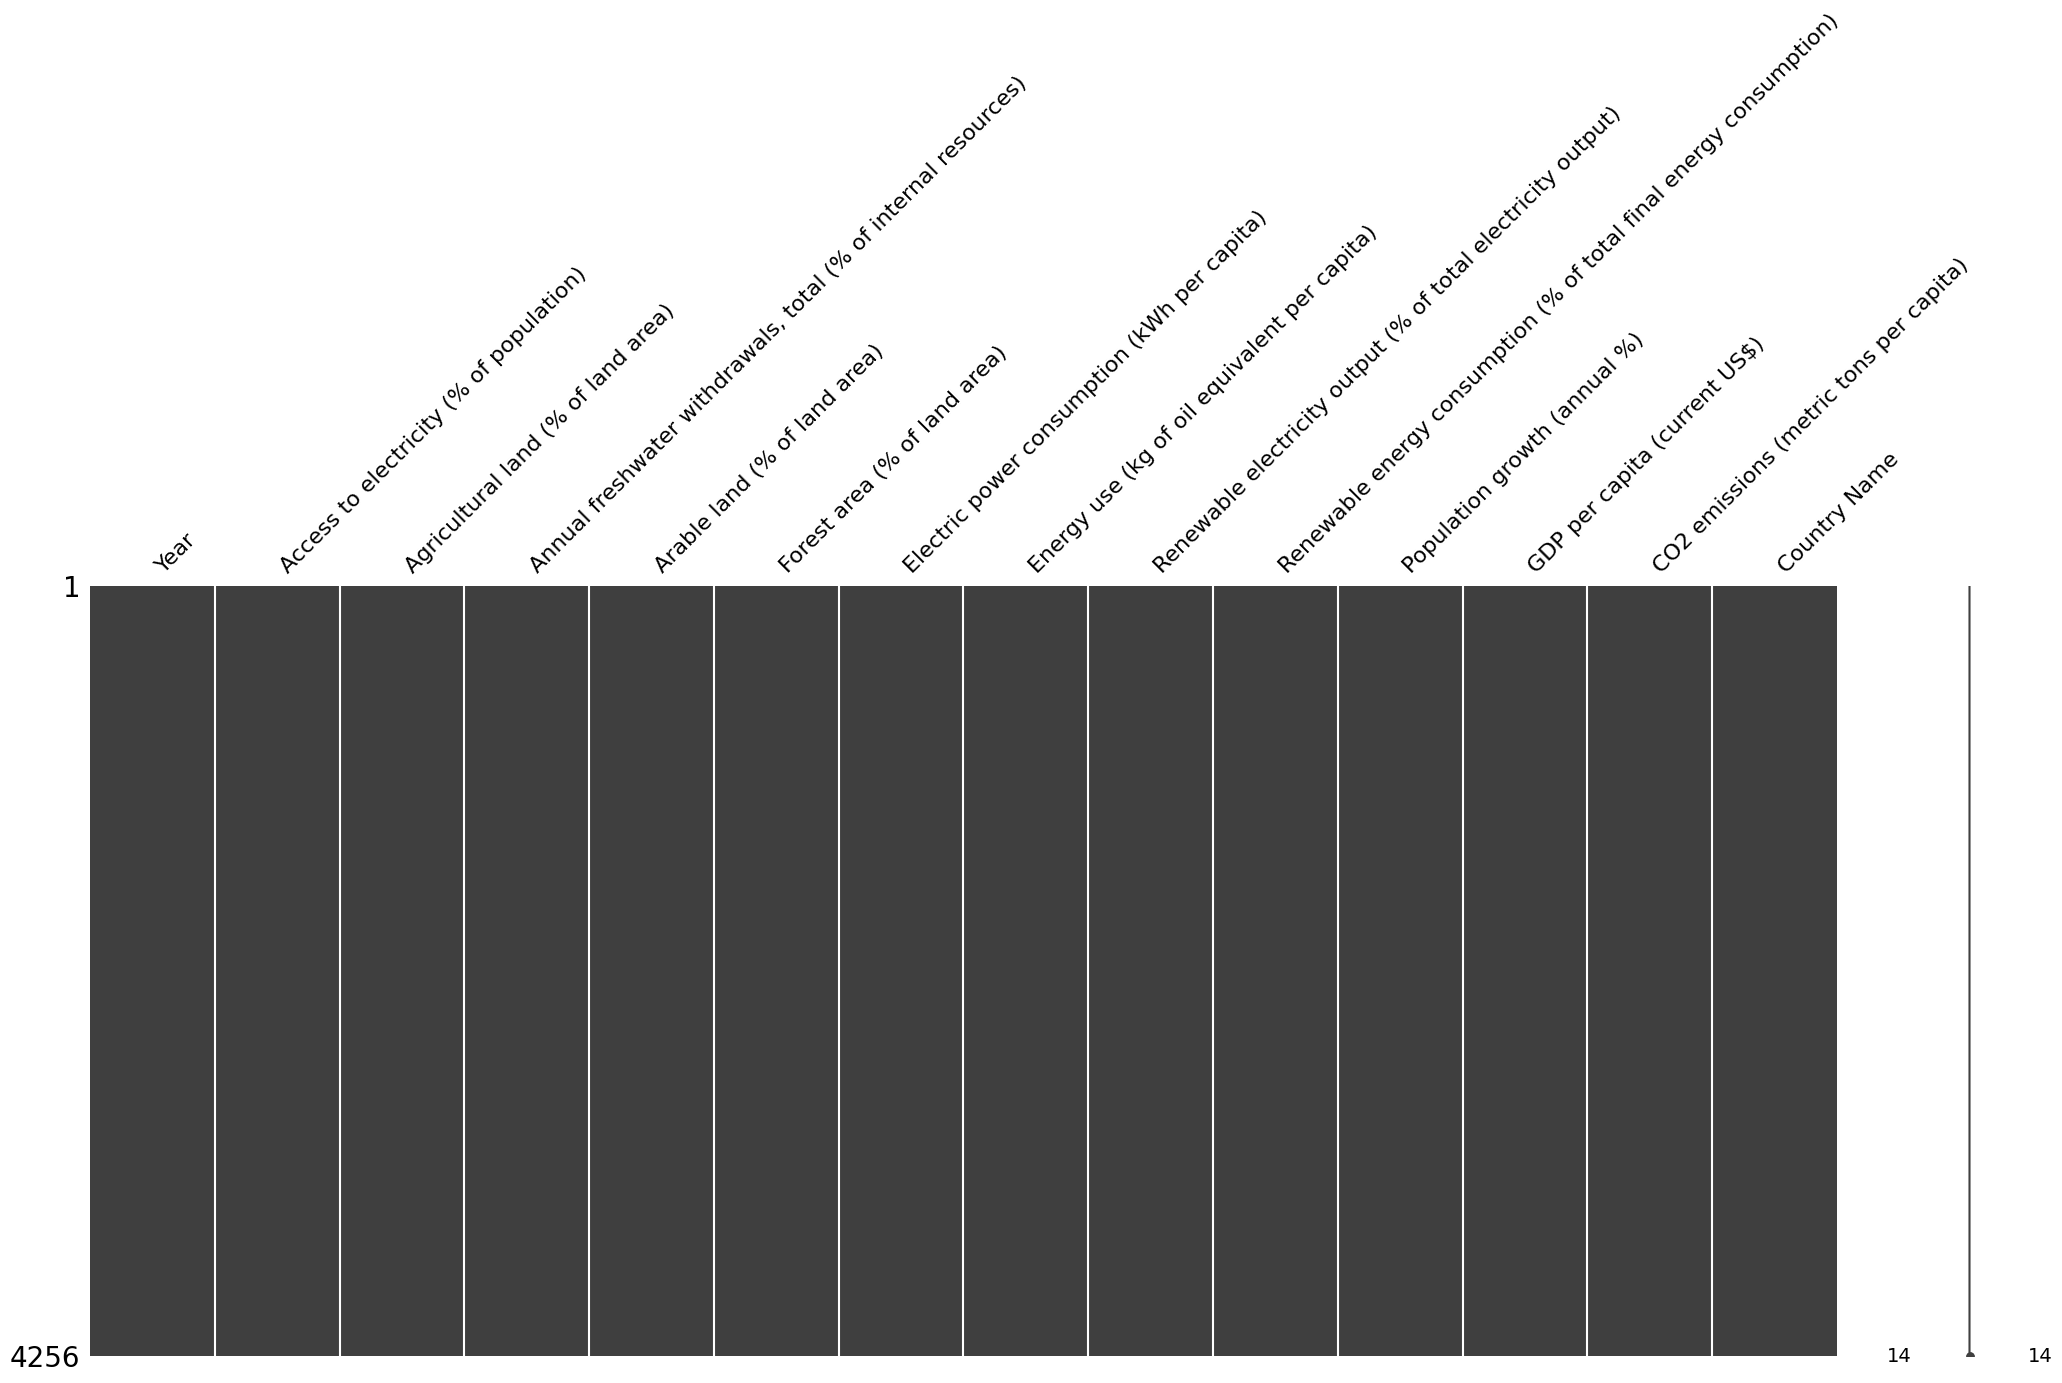

In [ ]:
#Total Number of Missing value of test dataset 0
train_without_nan = train1.copy()
plt.figure(figsize = (10, 5), dpi = 300)
msn.matrix(train_without_nan)
plt.show()

<Figure size 1800x1500 with 0 Axes>

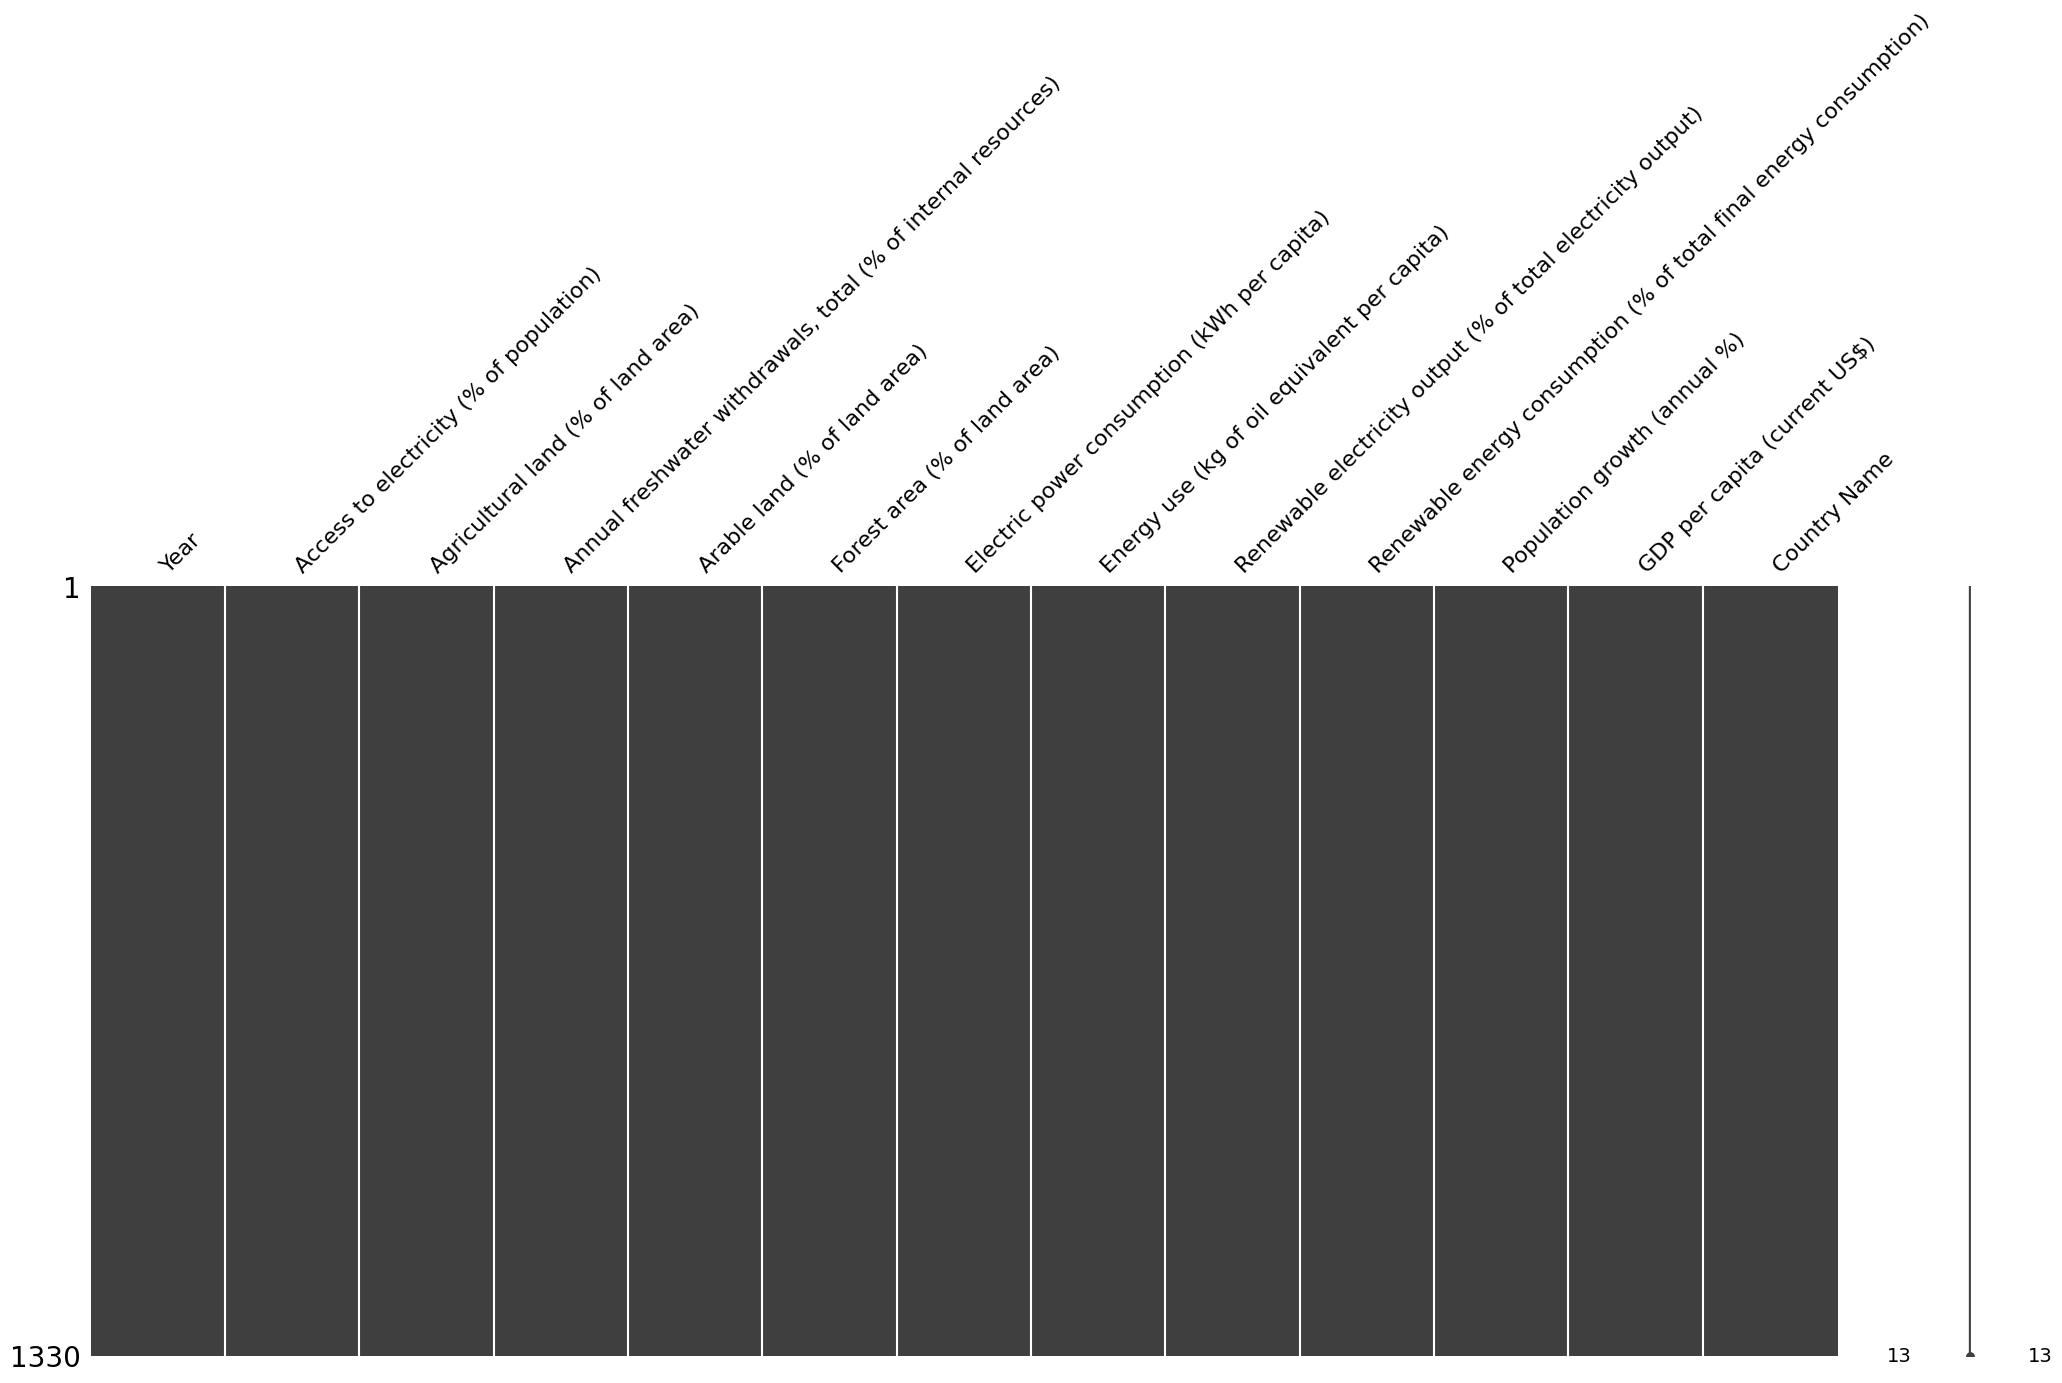

In [ ]:
test_without_nan = test2.copy()
plt.figure(figsize = (6, 5), dpi = 300)
msn.matrix(test_without_nan)
plt.show()

In [ ]:
train = train_without_nan.copy()
train.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita),Country Name
0,2000,4.446891,57.945817,43.015907,11.779587,1.852782,1586.591120,985.730004,74.989094,44.99,1.443803,182.174037,0.055167,Afghanistan
1,2001,9.294527,57.947350,43.015907,11.779587,1.852782,1587.375364,1011.679617,72.811460,45.60,0.742517,182.174037,0.055293,Afghanistan
2,2002,14.133616,57.939684,43.015907,11.771921,1.852782,1649.718098,1034.410867,79.063971,37.83,6.449321,182.174037,0.066810,Afghanistan
3,2003,18.971165,58.083805,43.015907,11.916042,1.852782,1738.666619,1010.524231,70.249729,36.66,7.541019,199.643228,0.073005,Afghanistan
4,2004,23.814182,58.151266,43.015907,11.983503,1.852782,1841.168267,1121.869767,70.890841,44.24,3.933178,221.830531,0.054867,Afghanistan


In [ ]:
test = test_without_nan.copy()
test.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),Country Name
0,2016,97.700000,58.123668,43.015907,11.850114,1.852782,2521.526241,1345.022432,83.304946,19.92,2.581549,523.053012,Afghanistan
1,2017,97.700000,58.123668,43.015907,11.804118,1.852782,2530.476238,1328.812588,86.049831,19.21,2.866492,526.140801,Afghanistan
2,2018,93.430878,58.276988,43.015907,11.949772,1.852782,2571.264165,1347.043548,82.565291,17.96,2.885208,492.090632,Afghanistan
3,2019,97.700000,58.276988,43.015907,11.940573,1.852782,2653.232630,1341.347557,85.036367,18.51,2.908529,497.741429,Afghanistan
4,2020,97.700000,58.741548,43.015907,12.003434,1.852782,2638.610601,1344.823016,85.306099,17.58,3.134747,512.055098,Afghanistan


In [ ]:
def Country_wise_prediction_with_xgb(train, test):
  test_pred_list = []

  for country in test['Country Name'].unique():
    country_train_df = train[train['Country Name'] == country]
    country_test_df = test[test['Country Name'] == country]

    X_train = country_train_df.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis="columns")
    y_train = country_train_df['CO2 emissions (metric tons per capita)']
    test_data = country_test_df.drop(['Country Name'], axis="columns")

    xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1)
    xgb_model.fit(X_train, y_train)
    test_pred = xgb_model.predict(test_data).tolist()
    test_pred_list.extend(test_pred)

  pred_df = pd.concat([pd.DataFrame(test_pred_list, columns=["CO2 emissions (metric tons per capita)"]), test], axis="columns")
  return pred_df[['Country Name', 'Year', 'CO2 emissions (metric tons per capita)']]

In [ ]:
# co2_predict_dataset = Country_wise_prediction_with_arima(train_without_nan)

co2_predict_dataset = Country_wise_prediction_with_xgb(train_without_nan, test_without_nan)

In [ ]:
co2_predict_dataset.to_csv("New_test.csv", index=False)

In [ ]:
co2_predict_dataset.head()

,Country Name,Year,CO2 emissions (metric tons per capita)
0,Afghanistan,2016,0.284377
1,Afghanistan,2017,0.284377
2,Afghanistan,2018,0.284858
3,Afghanistan,2019,0.284858
4,Afghanistan,2020,0.284858


In [ ]:
predicted_test = pd.read_csv("//content/New_test.csv")
predicted_test.head()

,Country Name,Year,CO2 emissions (metric tons per capita)
0,Afghanistan,2016,0.284377
1,Afghanistan,2017,0.284377
2,Afghanistan,2018,0.284858
3,Afghanistan,2019,0.284858
4,Afghanistan,2020,0.284858


In [ ]:
test.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),Country Name
0,2016,97.700000,58.123668,43.015907,11.850114,1.852782,2521.526241,1345.022432,83.304946,19.92,2.581549,523.053012,Afghanistan
1,2017,97.700000,58.123668,43.015907,11.804118,1.852782,2530.476238,1328.812588,86.049831,19.21,2.866492,526.140801,Afghanistan
2,2018,93.430878,58.276988,43.015907,11.949772,1.852782,2571.264165,1347.043548,82.565291,17.96,2.885208,492.090632,Afghanistan
3,2019,97.700000,58.276988,43.015907,11.940573,1.852782,2653.232630,1341.347557,85.036367,18.51,2.908529,497.741429,Afghanistan
4,2020,97.700000,58.741548,43.015907,12.003434,1.852782,2638.610601,1344.823016,85.306099,17.58,3.134747,512.055098,Afghanistan


In [ ]:
# Merge test data with submission data on Year and Country Name
merged_data = pd.merge(test,
                       predicted_test[['Year', 'Country Name', 'CO2 emissions (metric tons per capita)']],
                       on=['Year', 'Country Name'],
                       how='left')

# Reorder the columns to place the 'CO2 emissions (metric tons per capita)' column before 'Country Name'
columns = [col for col in merged_data.columns if col != 'CO2 emissions (metric tons per capita)']
columns.insert(columns.index('Country Name'), 'CO2 emissions (metric tons per capita)')
updated_test_data = merged_data[columns]

# Display the updated test data
updated_test_data.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita),Country Name
0,2016,97.700000,58.123668,43.015907,11.850114,1.852782,2521.526241,1345.022432,83.304946,19.92,2.581549,523.053012,0.284377,Afghanistan
1,2017,97.700000,58.123668,43.015907,11.804118,1.852782,2530.476238,1328.812588,86.049831,19.21,2.866492,526.140801,0.284377,Afghanistan
2,2018,93.430878,58.276988,43.015907,11.949772,1.852782,2571.264165,1347.043548,82.565291,17.96,2.885208,492.090632,0.284858,Afghanistan
3,2019,97.700000,58.276988,43.015907,11.940573,1.852782,2653.232630,1341.347557,85.036367,18.51,2.908529,497.741429,0.284858,Afghanistan
4,2020,97.700000,58.741548,43.015907,12.003434,1.852782,2638.610601,1344.823016,85.306099,17.58,3.134747,512.055098,0.284858,Afghanistan


In [ ]:
train.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita),Country Name
0,2000,4.446891,57.945817,43.015907,11.779587,1.852782,1586.591120,985.730004,74.989094,44.99,1.443803,182.174037,0.055167,Afghanistan
1,2001,9.294527,57.947350,43.015907,11.779587,1.852782,1587.375364,1011.679617,72.811460,45.60,0.742517,182.174037,0.055293,Afghanistan
2,2002,14.133616,57.939684,43.015907,11.771921,1.852782,1649.718098,1034.410867,79.063971,37.83,6.449321,182.174037,0.066810,Afghanistan
3,2003,18.971165,58.083805,43.015907,11.916042,1.852782,1738.666619,1010.524231,70.249729,36.66,7.541019,199.643228,0.073005,Afghanistan
4,2004,23.814182,58.151266,43.015907,11.983503,1.852782,1841.168267,1121.869767,70.890841,44.24,3.933178,221.830531,0.054867,Afghanistan


In [ ]:
updated_test_data.to_csv("updated_test_data.csv", index=False)

In [ ]:
# Concatenate datasets row-wise
merged_df_2 = pd.concat([train, updated_test_data], ignore_index=True)

# Print or further process the merged dataset
merged_df_2.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita),Country Name
0,2000,4.446891,57.945817,43.015907,11.779587,1.852782,1586.591120,985.730004,74.989094,44.99,1.443803,182.174037,0.055167,Afghanistan
1,2001,9.294527,57.947350,43.015907,11.779587,1.852782,1587.375364,1011.679617,72.811460,45.60,0.742517,182.174037,0.055293,Afghanistan
2,2002,14.133616,57.939684,43.015907,11.771921,1.852782,1649.718098,1034.410867,79.063971,37.83,6.449321,182.174037,0.066810,Afghanistan
3,2003,18.971165,58.083805,43.015907,11.916042,1.852782,1738.666619,1010.524231,70.249729,36.66,7.541019,199.643228,0.073005,Afghanistan
4,2004,23.814182,58.151266,43.015907,11.983503,1.852782,1841.168267,1121.869767,70.890841,44.24,3.933178,221.830531,0.054867,Afghanistan


In [ ]:
merged_df_2.to_csv("CO2_Emission.csv", index=False)

In [ ]:
# Sort by the column 'Country'
merged_df_sorted = merged_df_2.sort_values(by=['Country Name','Year'])

# Reset index (optional)
merged_df_sorted.reset_index(drop=True, inplace=True)

# Print or further process the sorted dataset
merged_df_sorted.head(30)

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita),Country Name
0,2000,4.446891,57.945817,43.015907,11.779587,1.852782,1586.591120,985.730004,74.989094,44.990000,1.443803,182.174037,0.055167,Afghanistan
1,2001,9.294527,57.947350,43.015907,11.779587,1.852782,1587.375364,1011.679617,72.811460,45.600000,0.742517,182.174037,0.055293,Afghanistan
2,2002,14.133616,57.939684,43.015907,11.771921,1.852782,1649.718098,1034.410867,79.063971,37.830000,6.449321,182.174037,0.066810,Afghanistan
3,2003,18.971165,58.083805,43.015907,11.916042,1.852782,1738.666619,1010.524231,70.249729,36.660000,7.541019,199.643228,0.073005,Afghanistan
4,2004,23.814182,58.151266,43.015907,11.983503,1.852782,1841.168267,1121.869767,70.890841,44.240000,3.933178,221.830531,0.054867,Afghanistan
5,2005,28.669672,58.134400,43.015907,11.966638,1.852782,1953.440499,1170.471485,74.061810,33.880000,3.576508,254.115274,0.080361,Afghanistan
6,2006,33.544418,58.123668,43.015907,11.949772,1.852782,2036.349542,1166.243330,70.755750,31.890000,4.139678,274.015394,0.089757,Afghanistan
7,2007,38.440002,58.129801,43.015907,11.949772,1.852782,2048.536598,1179.568641,72.000000,28.780000,1.793196,376.318296,0.109940,Afghanistan
8,2008,42.400000,58.132867,43.015907,11.949772,1.852782,2026.992149,1244.901122,68.654822,21.170000,2.002333,382.533804,0.165573,Afghanistan
9,2009,48.279007,58.132867,43.015907,11.948239,1.852782,2068.795984,1235.017146,87.176603,16.530000,3.561288,453.387382,0.239507,Afghanistan


In [ ]:
merged_df_sorted.to_csv("CO2_Emission_1.csv", index=False)

In [ ]:
df = pd.read_csv("/content/CO2_Emission_1.csv")
df.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita),Country Name
0,2000,4.446891,57.945817,43.015907,11.779587,1.852782,1586.591120,985.730004,74.989094,44.99,1.443803,182.174037,0.055167,Afghanistan
1,2001,9.294527,57.947350,43.015907,11.779587,1.852782,1587.375364,1011.679617,72.811460,45.60,0.742517,182.174037,0.055293,Afghanistan
2,2002,14.133616,57.939684,43.015907,11.771921,1.852782,1649.718098,1034.410867,79.063971,37.83,6.449321,182.174037,0.066810,Afghanistan
3,2003,18.971165,58.083805,43.015907,11.916042,1.852782,1738.666619,1010.524231,70.249729,36.66,7.541019,199.643228,0.073005,Afghanistan
4,2004,23.814182,58.151266,43.015907,11.983503,1.852782,1841.168267,1121.869767,70.890841,44.24,3.933178,221.830531,0.054867,Afghanistan


#Explotary

In [ ]:
df_a = df.copy()
country = df_a.groupby('Country Name')
df_a.sample(10)

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita),Country Name
1499,2008,100.000000,21.391838,12.619984,14.102383,54.649540,6364.567830,4105.417736,1.861828,20.450000,-0.268134,18204.966480,13.074288,Estonia
4197,2018,100.000000,19.041714,12.323944,5.659526,55.845547,2571.264165,1347.043548,1.527709,1.360000,-4.048391,31615.066790,2.817591,Puerto Rico
842,2002,100.000000,11.250000,8.502719,0.833333,53.700000,1649.718098,1034.410867,0.000000,0.000000,3.357997,75435.614220,2.244402,Cayman Islands
806,2008,100.000000,6.628900,1.405519,4.292523,38.750173,16377.479700,8194.880771,61.472527,21.300000,1.082907,46710.505580,16.559426,Canada
3859,2016,98.981041,38.515685,8.468486,10.190814,30.582410,2521.526241,1345.022432,23.383113,20.810000,1.133234,6117.871507,2.817084,Not classified
1051,2001,30.327034,30.863836,0.020541,1.434846,64.957540,103.561629,244.536356,100.000000,61.180000,3.759633,859.440012,1.304047,"Congo, Rep."
574,2007,99.700000,41.972656,1.097465,19.960938,41.120254,2236.845651,1323.415694,33.952817,14.840000,-1.245001,3936.931747,4.712845,Bosnia and Herzegovina
1626,2009,98.941772,27.492296,5.599390,10.289046,39.361982,3962.343037,2883.093133,17.990861,5.289703,0.494775,6468.612409,7.174171,Europe & Central Asia (excluding high income)
5406,2009,33.291115,15.340443,8.600556,1.640689,36.283839,2068.795984,153.276840,18.989369,38.660000,2.422628,2472.463564,0.531939,Vanuatu
589,2001,24.800000,45.526088,8.095455,0.352902,30.883137,1164.631966,1030.892260,0.000000,37.510000,2.003269,3115.679000,2.193958,Botswana


In [ ]:
# Draw a Histogram for CO2 Emissions
hist_data = df_a['CO2 emissions (metric tons per capita)']
skewness = skew(hist_data)
co2_kurtosis = kurtosis(hist_data)
co2_emissions_fig = ff.create_distplot([hist_data], ['CO2 Emissions'], curve_type='kde')
co2_emissions_fig.update_layout(title= f"C02 Emissions Distribution. Skewness: {round(skewness, 2)} and Kurtosis: {round(co2_kurtosis, 2)}")
co2_emissions_fig.show()

In [ ]:
df_copy = df.copy()
df_copy['log_CO2_emissions'] = np.log(df['CO2 emissions (metric tons per capita)'])
log_CO2_emissions = df_copy['log_CO2_emissions'].dropna()
fig = px.histogram(df_copy, x='log_CO2_emissions', nbins=50, histnorm='density', marginal='box')
fig.update_layout(title='Kernel Density Estimate (KDE) Plot of Log Transformed CO2 Emissions',
                  xaxis_title='Log Transformed CO2 Emissions',
                  yaxis_title='Density')
fig.show()

In [ ]:
country_groups = df.groupby("Country Name")

Low_income = country_groups.get_group("Low income")
Lower_middle_income = country_groups.get_group("Lower middle income")
Middle_income = country_groups.get_group("Middle income")
Upper_middle_income = country_groups.get_group("Upper middle income")
High_income = country_groups.get_group("High income")

pie_labels = ['Low Income', 'Lower Middle Income', 'Middle Income', "Upper Middle Income", "High Income"]
pie_values = [Low_income['CO2 emissions (metric tons per capita)'].mean(),
              Lower_middle_income['CO2 emissions (metric tons per capita)'].mean(),
              Middle_income['CO2 emissions (metric tons per capita)'].mean(),
              Upper_middle_income['CO2 emissions (metric tons per capita)'].mean(),
              High_income['CO2 emissions (metric tons per capita)'].mean()]

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'xy'}, {'type': 'domain'}]])

fig.add_trace(go.Scatter(x=Low_income["Year"], y=Low_income["CO2 emissions (metric tons per capita)"], name="Low Income"), row=1, col=1)
fig.add_trace(go.Scatter(x=Lower_middle_income["Year"], y=Lower_middle_income["CO2 emissions (metric tons per capita)"], name="Lower Middle Income"), row=1, col=1)
fig.add_trace(go.Scatter(x=Middle_income["Year"], y=Middle_income["CO2 emissions (metric tons per capita)"], name="Middle Income"), row=1, col=1)
fig.add_trace(go.Scatter(x=Upper_middle_income["Year"], y=Upper_middle_income["CO2 emissions (metric tons per capita)"], name="Upper Middle Income"), row=1, col=1)
fig.add_trace(go.Scatter(x=High_income["Year"], y=High_income["CO2 emissions (metric tons per capita)"], name="High Income"), row=1, col=1)

fig.add_trace(go.Pie(labels=pie_labels, values=pie_values), row=1, col=2)

fig.update_layout(title="Compare CO2 Emissions Between Socio Economic Categories",
                  xaxis_title="Year", yaxis_title="CO2 Emissions")
fig.show()

In [ ]:
regions = {
    'East Asia and Pacific':['American Samoa','Australia','Brunei Darussalam','Cambodia','China','Fiji','French Polynesia',
                             'Guam','Hong Kong SAR, China','Indonesia','Japan','Kiribati',"Korea, Dem. People's Rep.",
                             'Korea, Rep.','Lao PDR','Macao SAR, China','Malaysia','Marshall Islands','Micronesia, Fed. Sts.',
                             'Mongolia','Myanmar','Nauru','New Caledonia','New Zealand','Northern Mariana Islands','Palau','Philippines','Samoa','Singapore','Solomon Islands','Taiwan, China','Thailand','Timor-Leste','Papua New Guinea','Tonga','Tuvalu','Vanuatu','Vietnam'],
    'Europe and Central Asia':['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Channel Islands','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Faroe Islands','Finland','France','Georgia','Germany','Gibraltar','Greece','Greenland','Hungary','Iceland','Ireland','Isle of Man','Italy','Kazakhstan','Kosovo','Kyrgyz Republic','Latvia','Liechtenstein','Lithuania','Luxembourg','Moldova','Monaco','Montenegro',
                               'Netherlands','North Macedonia','Norway','Poland','Portugal','Romania','Russian Federation','San Marino','Serbia','Slovak Republic','Slovenia','Spain','Sweden','Switzerland','Tajikistan','Türkiye','Turkmenistan','Ukraine','United Kingdom','Uzbekistan'],
    'Latin America and the Caribbean':['Antigua and Barbuda','Argentina','Aruba','Bahamas, The','Barbados','Belize','Bolivia','Brazil','British Virgin Islands','Cayman Islands','Chile','Colombia','Costa Rica','Cuba','Curacao','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Sint Maarten (Dutch part)','St. Kitts and Nevis','St. Lucia','St. Martin (French part)','St. Vincent and the Grenadines','Suriname','Trinidad and Tobago',
                                       'Turks and Caicos Islands','Uruguay','Venezuela, RB','Virgin Islands (U.S.)'],
    'Middle East and North Africa':['Algeria','Bahrain','Djibouti','Egypt, Arab Rep.','Iran, Islamic Rep.','Iraq','Israel','Jordan','Kuwait','Lebanon','Libya','Malta','Morocco','Oman','Qatar','Saudi Arabia','Syrian Arab Republic','Tunisia','United Arab Emirates','West Bank and Gaza','Yemen, Rep.'],
    'North America':['Bermuda','Canada','United States'],
    'South Asia':['Afghanistan','Bangladesh','Bhutan','India','Maldives','Nepal','Pakistan','Sri Lanka'],
    'Sub-Saharan Africa':['Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde','Cameroon','Central African Republic','Chad','Comoros','Congo, Dem. Rep.','Congo, Rep',"Côte d'Ivoire",'Equatorial Guinea','Eritrea','Eswatini','Ethiopia','Gabon','Gambia, The','Ghana','Guinea','Guinea-Bissau','Kenya','Lesotho','Liberia','Madagascar','Malawi','Mali','Mauritania','Mauritius','Mozambique','Namibia','Niger','Nigeria','Rwanda','São Tomé and Principe','Senegal','Seychelles',
                          'Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Tanzania','Togo','Uganda','Zambia','Zimbabwe']
}

region_co2_total = {region: 0 for region in regions.keys()}
for region, countries in regions.items():
    for country in countries:
        region_co2_total[region] += df[df['Country Name'] == country]['CO2 emissions (metric tons per capita)'].sum()
total_co2 = sum(region_co2_total.values())

region_co2_percentage = {region: (co2_total / total_co2) * 100 for region, co2_total in region_co2_total.items()}
fig = px.pie(names=list(region_co2_percentage.keys()), values=list(region_co2_percentage.values()), title='Percentage of CO2 Emissions by Region')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=600, width=1200)
fig.show()

In [ ]:
total_co2_by_country = df.groupby('Country Name')['CO2 emissions (metric tons per capita)'].sum()
total_co2_by_country_sorted = total_co2_by_country.sort_values(ascending=False)
top_n = 20
top_n_countries = total_co2_by_country_sorted.head(top_n)
fig = go.Figure(go.Bar(
    x=top_n_countries,
    y=top_n_countries.index,
    orientation='h',
    marker_color='blue',
    text=top_n_countries.values.round(2),
    textposition='outside'
))
fig.update_layout(
    title=f'Top {top_n} Countries by Total CO2 Emissions',
    xaxis_title='Total CO2 Emissions (metric tons per capita)- From 2000 to 2020',
    yaxis_title='Country',
    yaxis=dict(autorange='reversed'),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()

In [ ]:
average_co2_by_country = df.groupby('Country Name')['CO2 emissions (metric tons per capita)'].mean()
average_co2_by_country_sorted = average_co2_by_country.sort_values(ascending=False)
top_n = 20
top_n_countries = average_co2_by_country_sorted.head(top_n)
fig = go.Figure(go.Bar(
    x=top_n_countries,
    y=top_n_countries.index,
    orientation='h',
    marker_color='blue',
    text=top_n_countries.values.round(2),
    textposition='outside'
))
fig.update_layout(
    title=f'Top {top_n} Countries by Average CO2 Emissions',
    xaxis_title='Average CO2 Emissions (metric tons per capita)',
    yaxis_title='Country',
    yaxis=dict(autorange='reversed'),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()

In [ ]:
df_years = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]
country_co2_years = df_years.groupby(['Country Name', 'Year'])['CO2 emissions (metric tons per capita)'].sum().reset_index()
fig = px.choropleth(country_co2_years,
                    locations='Country Name',
                    locationmode='country names',
                    color='CO2 emissions (metric tons per capita)',
                    hover_name='Country Name',
                    animation_frame='Year',
                    title='CO2 Emissions by Country (2000-2015)',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(height=800, width=1200)
fig.show()

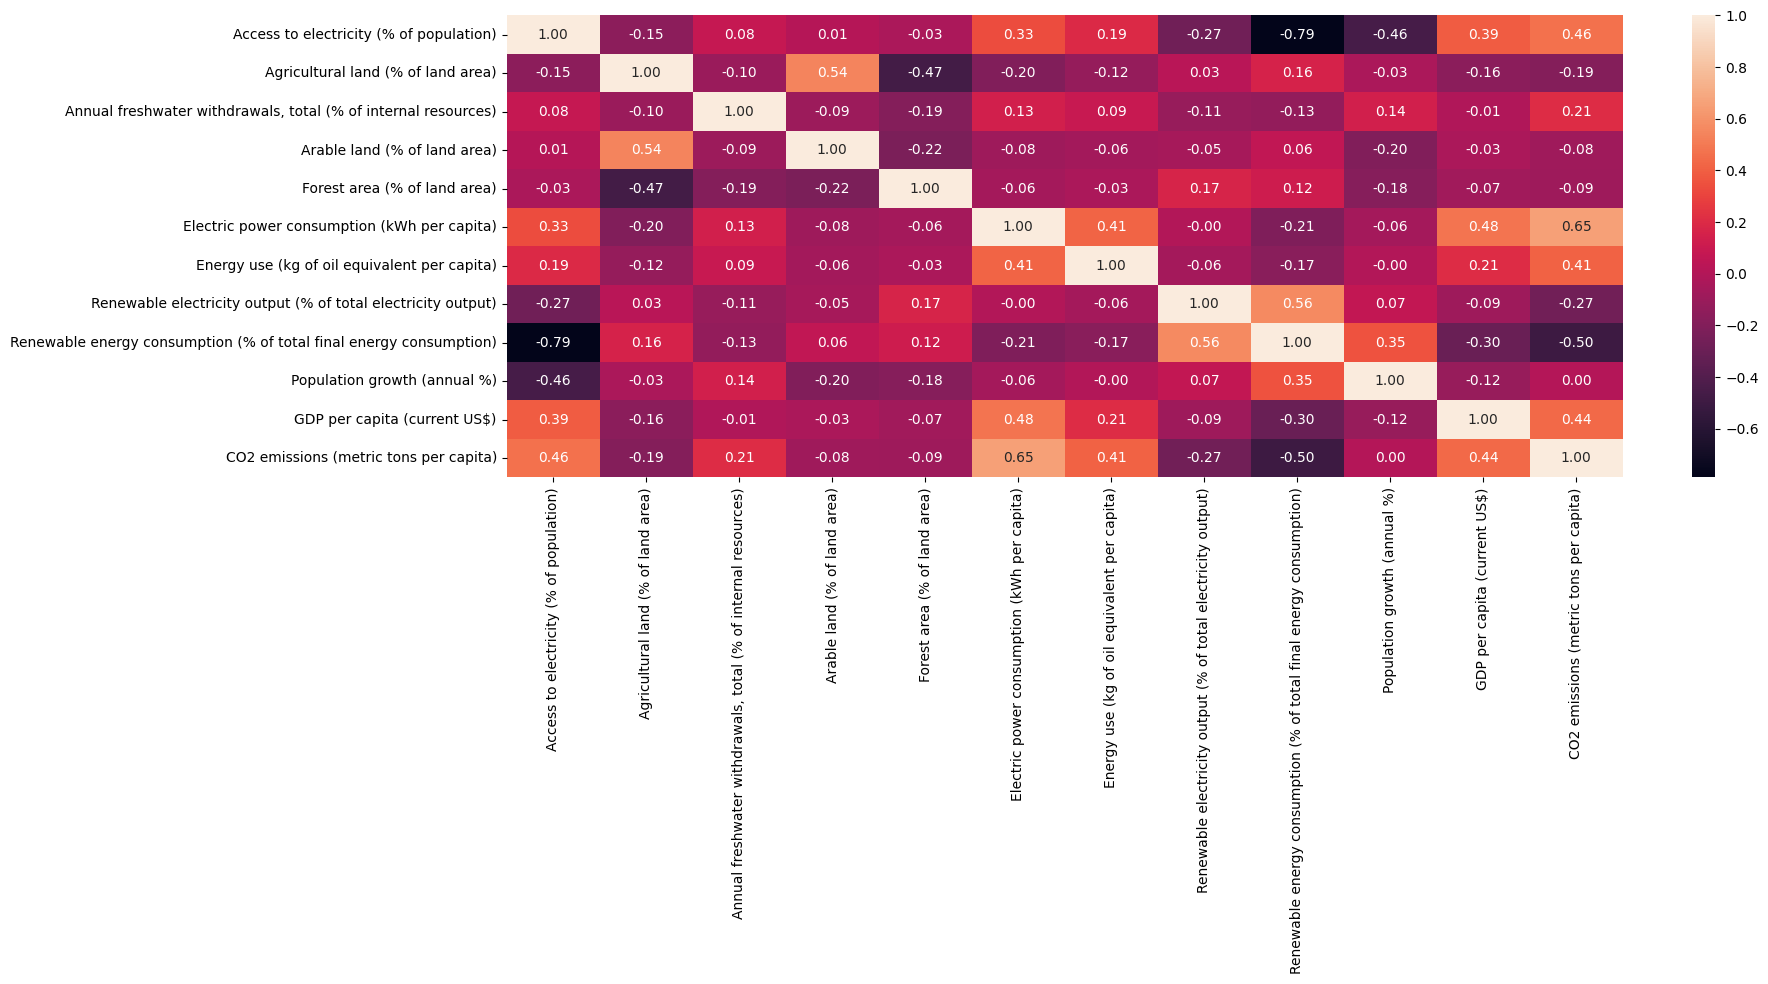

In [ ]:
plt.figure(figsize = (18, 6))
sns.heatmap(df.select_dtypes(include=['float64']).corr(), annot=True, fmt=".2f")
plt.show()

#Convert the CO2 emissions (metric tons per capita) attribute into Yes and No class for classification:

---



In [ ]:
df1 = df.copy()
# Define thresholds for CO2 emissions classification
def classify_co2_emissions(co2):
    if co2 < 3:
        return 'Low'
    else:
        return 'High'

# Apply the classification
df1['CO2 emissions category'] = df1['CO2 emissions (metric tons per capita)'].apply(classify_co2_emissions)

# Drop the original CO2 emissions column
df1 = df1.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis=1)

In [ ]:
df1["CO2 emissions category"].value_counts()

CO2 emissions category
Low     3266
High    2320
Name: count, dtype: int64

In [ ]:
df1.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions category
0,2000,4.446891,57.945817,43.015907,11.779587,1.852782,1586.591120,985.730004,74.989094,44.99,1.443803,182.174037,Low
1,2001,9.294527,57.947350,43.015907,11.779587,1.852782,1587.375364,1011.679617,72.811460,45.60,0.742517,182.174037,Low
2,2002,14.133616,57.939684,43.015907,11.771921,1.852782,1649.718098,1034.410867,79.063971,37.83,6.449321,182.174037,Low
3,2003,18.971165,58.083805,43.015907,11.916042,1.852782,1738.666619,1010.524231,70.249729,36.66,7.541019,199.643228,Low
4,2004,23.814182,58.151266,43.015907,11.983503,1.852782,1841.168267,1121.869767,70.890841,44.24,3.933178,221.830531,Low


In [ ]:
X = df1.drop(['CO2 emissions category'], axis=1)
y = df1['CO2 emissions category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4468, 12)
X_test shape: (1118, 12)
y_train shape: (4468,)
y_test shape: (1118,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': [], 'sensitivity': [], 'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []} for label in labels}

# Perform KFold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    knn.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Extract evaluation metrics for each label
    for idx, label in enumerate(labels):
        tp = cm[idx, idx]  # True Positive
        fn = cm[idx, :].sum() - tp  # False Negative
        fp = cm[:, idx].sum() - tp  # False Positive
        tn = cm.sum() - (tp + fn + fp)  # True Negative

        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = report[str(label)]['precision']
        recall = report[str(label)]['recall']
        f1_score = report[str(label)]['f1-score']
        accuracy = report['accuracy']

        avg_scores[label]['specificity'].append(specificity)
        avg_scores[label]['sensitivity'].append(sensitivity)
        avg_scores[label]['precision'].append(precision)
        avg_scores[label]['recall'].append(recall)
        avg_scores[label]['f1_score'].append(f1_score)
        avg_scores[label]['accuracy'].append(accuracy)

    # Print evaluation metrics for each label after each iteration
    print(f"\nFold {i+1}:")
    for label in labels:
        print(f"\nLabel '{label}' Scores:")
        print("Specificity:", avg_scores[label]['specificity'][-1])
        print("Sensitivity:", avg_scores[label]['sensitivity'][-1])
        print("Precision:", avg_scores[label]['precision'][-1])
        print("Recall:", avg_scores[label]['recall'][-1])
        print("F1 Score:", avg_scores[label]['f1_score'][-1])
        print("Accuracy:", avg_scores[label]['accuracy'][-1])

# Summarize results across all folds
print("\nAverage scores across all folds:")
for label in labels:
    print(f"\nLabel '{label}' Average Scores:")
    print("Specificity:", sum(avg_scores[label]['specificity']) / len(avg_scores[label]['specificity']))
    print("Sensitivity:", sum(avg_scores[label]['sensitivity']) / len(avg_scores[label]['sensitivity']))
    print("Precision:", sum(avg_scores[label]['precision']) / len(avg_scores[label]['precision']))
    print("Recall:", sum(avg_scores[label]['recall']) / len(avg_scores[label]['recall']))
    print("F1 Score:", sum(avg_scores[label]['f1_score']) / len(avg_scores[label]['f1_score']))
    print("Accuracy:", sum(avg_scores[label]['accuracy']) / len(avg_scores[label]['accuracy']))



Fold 1:

Label 'Low' Scores:
Specificity: 0.9037656903765691
Sensitivity: 0.9609375
Precision: 0.9304084720121029
Recall: 0.9609375
F1 Score: 0.9454265949269792
Accuracy: 0.9364937388193202

Label 'High' Scores:
Specificity: 0.9609375
Sensitivity: 0.9037656903765691
Precision: 0.9452954048140044
Recall: 0.9037656903765691
F1 Score: 0.9240641711229947
Accuracy: 0.9364937388193202

Fold 2:

Label 'Low' Scores:
Specificity: 0.9139072847682119
Sensitivity: 0.9533132530120482
Precision: 0.9419642857142857
Recall: 0.9533132530120482
F1 Score: 0.9476047904191617
Accuracy: 0.937332139659803

Label 'High' Scores:
Specificity: 0.9533132530120482
Sensitivity: 0.9139072847682119
Precision: 0.9303370786516854
Recall: 0.9139072847682119
F1 Score: 0.9220489977728286
Accuracy: 0.937332139659803

Fold 3:

Label 'Low' Scores:
Specificity: 0.9192139737991266
Sensitivity: 0.9650986342943855
Precision: 0.9450222882615156
Recall: 0.9650986342943855
F1 Score: 0.954954954954955
Accuracy: 0.946284691136974

L

In [ ]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier()

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': [], 'sensitivity': [], 'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []} for label in labels}

# Perform KFold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    dt.fit(X_train, y_train)

    # Predict on the test data
    y_pred = dt.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Extract evaluation metrics for each label
    for idx, label in enumerate(labels):
        tp = cm[idx, idx]  # True Positive
        fn = cm[idx, :].sum() - tp  # False Negative
        fp = cm[:, idx].sum() - tp  # False Positive
        tn = cm.sum() - (tp + fn + fp)  # True Negative

        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = report[str(label)]['precision']
        recall = report[str(label)]['recall']
        f1_score = report[str(label)]['f1-score']
        accuracy = report['accuracy']

        avg_scores[label]['specificity'].append(specificity)
        avg_scores[label]['sensitivity'].append(sensitivity)
        avg_scores[label]['precision'].append(precision)
        avg_scores[label]['recall'].append(recall)
        avg_scores[label]['f1_score'].append(f1_score)
        avg_scores[label]['accuracy'].append(accuracy)

    # Print evaluation metrics for each label after each iteration
    print(f"Fold {i+1}:")
    for label in labels:
        print(f"\nLabel '{label}' Scores:")
        print("Specificity:", avg_scores[label]['specificity'][-1])
        print("Sensitivity:", avg_scores[label]['sensitivity'][-1])
        print("Precision:", avg_scores[label]['precision'][-1])
        print("Recall:", avg_scores[label]['recall'][-1])
        print("F1 Score:", avg_scores[label]['f1_score'][-1])
        print("Accuracy:", avg_scores[label]['accuracy'][-1])

# Summarize results across all folds
print("\nAverage scores across all folds:")
for label in labels:
    print(f"\nLabel '{label}' Average Scores:")
    print("Specificity:", sum(avg_scores[label]['specificity']) / len(avg_scores[label]['specificity']))
    print("Sensitivity:", sum(avg_scores[label]['sensitivity']) / len(avg_scores[label]['sensitivity']))
    print("Precision:", sum(avg_scores[label]['precision']) / len(avg_scores[label]['precision']))
    print("Recall:", sum(avg_scores[label]['recall']) / len(avg_scores[label]['recall']))
    print("F1 Score:", sum(avg_scores[label]['f1_score']) / len(avg_scores[label]['f1_score']))
    print("Accuracy:", sum(avg_scores[label]['accuracy']) / len(avg_scores[label]['accuracy']))


Fold 1:

Label 'Low' Scores:
Specificity: 0.9728033472803347
Sensitivity: 0.9921875
Precision: 0.9799382716049383
Recall: 0.9921875
F1 Score: 0.9860248447204969
Accuracy: 0.9838998211091234

Label 'High' Scores:
Specificity: 0.9921875
Sensitivity: 0.9728033472803347
Precision: 0.9893617021276596
Recall: 0.9728033472803347
F1 Score: 0.9810126582278481
Accuracy: 0.9838998211091234
Fold 2:

Label 'Low' Scores:
Specificity: 0.977924944812362
Sensitivity: 0.9879518072289156
Precision: 0.984984984984985
Recall: 0.9879518072289156
F1 Score: 0.9864661654135338
Accuracy: 0.9838854073410922

Label 'High' Scores:
Specificity: 0.9879518072289156
Sensitivity: 0.977924944812362
Precision: 0.9822616407982262
Recall: 0.977924944812362
F1 Score: 0.9800884955752213
Accuracy: 0.9838854073410922
Fold 3:

Label 'Low' Scores:
Specificity: 0.9847161572052402
Sensitivity: 0.9878603945371776
Precision: 0.9893617021276596
Recall: 0.9878603945371776
F1 Score: 0.9886104783599089
Accuracy: 0.9865711727842436

Labe

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': [], 'sensitivity': [], 'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []} for label in labels}

# Perform KFold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    svm.fit(X_train, y_train)

    # Predict on the test data
    y_pred = svm.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Extract evaluation metrics for each label
    for idx, label in enumerate(labels):
        tp = cm[idx, idx]  # True Positive
        fn = cm[idx, :].sum() - tp  # False Negative
        fp = cm[:, idx].sum() - tp  # False Positive
        tn = cm.sum() - (tp + fn + fp)  # True Negative

        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = report[str(label)]['precision']
        recall = report[str(label)]['recall']
        f1_score = report[str(label)]['f1-score']
        accuracy = report['accuracy']

        avg_scores[label]['specificity'].append(specificity)
        avg_scores[label]['sensitivity'].append(sensitivity)
        avg_scores[label]['precision'].append(precision)
        avg_scores[label]['recall'].append(recall)
        avg_scores[label]['f1_score'].append(f1_score)
        avg_scores[label]['accuracy'].append(accuracy)

    # Print evaluation metrics for each label after each iteration
    print(f"Fold {i+1}:")
    for label in labels:
        print(f"\nLabel '{label}' Scores:")
        print("Specificity:", avg_scores[label]['specificity'][-1])
        print("Sensitivity:", avg_scores[label]['sensitivity'][-1])
        print("Precision:", avg_scores[label]['precision'][-1])
        print("Recall:", avg_scores[label]['recall'][-1])
        print("F1 Score:", avg_scores[label]['f1_score'][-1])
        print("Accuracy:", avg_scores[label]['accuracy'][-1])

# Summarize results across all folds
print("\nAverage scores across all folds:")
for label in labels:
    print(f"\nLabel '{label}' Average Scores:")
    print("Specificity:", sum(avg_scores[label]['specificity']) / len(avg_scores[label]['specificity']))
    print("Sensitivity:", sum(avg_scores[label]['sensitivity']) / len(avg_scores[label]['sensitivity']))
    print("Precision:", sum(avg_scores[label]['precision']) / len(avg_scores[label]['precision']))
    print("Recall:", sum(avg_scores[label]['recall']) / len(avg_scores[label]['recall']))
    print("F1 Score:", sum(avg_scores[label]['f1_score']) / len(avg_scores[label]['f1_score']))
    print("Accuracy:", sum(avg_scores[label]['accuracy']) / len(avg_scores[label]['accuracy']))


Fold 1:

Label 'Low' Scores:
Specificity: 0.8158995815899581
Sensitivity: 0.9171875
Precision: 0.8696296296296296
Recall: 0.9171875
F1 Score: 0.8927756653992396
Accuracy: 0.8738819320214669

Label 'High' Scores:
Specificity: 0.9171875
Sensitivity: 0.8158995815899581
Precision: 0.8803611738148984
Recall: 0.8158995815899581
F1 Score: 0.8469055374592834
Accuracy: 0.8738819320214669
Fold 2:

Label 'Low' Scores:
Specificity: 0.8520971302428256
Sensitivity: 0.9096385542168675
Precision: 0.9001490312965723
Recall: 0.9096385542168675
F1 Score: 0.904868913857678
Accuracy: 0.8863025962399284

Label 'High' Scores:
Specificity: 0.9096385542168675
Sensitivity: 0.8520971302428256
Precision: 0.8654708520179372
Recall: 0.8520971302428256
F1 Score: 0.8587319243604005
Accuracy: 0.8863025962399284
Fold 3:

Label 'Low' Scores:
Specificity: 0.7751091703056768
Sensitivity: 0.9317147192716236
Precision: 0.8563458856345886
Recall: 0.9317147192716236
F1 Score: 0.8924418604651163
Accuracy: 0.8675022381378693

L

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize SVM classifier with a non-linear kernel (RBF)
svm = SVC(kernel='rbf', probability=True)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': [], 'sensitivity': [], 'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []} for label in labels}

# Perform KFold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    svm.fit(X_train, y_train)

    # Predict on the test data
    y_pred = svm.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Extract evaluation metrics for each label
    for idx, label in enumerate(labels):
        tp = cm[idx, idx]  # True Positive
        fn = cm[idx, :].sum() - tp  # False Negative
        fp = cm[:, idx].sum() - tp  # False Positive
        tn = cm.sum() - (tp + fn + fp)  # True Negative

        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = report[str(label)]['precision']
        recall = report[str(label)]['recall']
        f1_score = report[str(label)]['f1-score']
        accuracy = report['accuracy']

        avg_scores[label]['specificity'].append(specificity)
        avg_scores[label]['sensitivity'].append(sensitivity)
        avg_scores[label]['precision'].append(precision)
        avg_scores[label]['recall'].append(recall)
        avg_scores[label]['f1_score'].append(f1_score)
        avg_scores[label]['accuracy'].append(accuracy)

    # Print evaluation metrics for each label after each iteration
    print(f"Fold {i+1}:")
    for label in labels:
        print(f"\nLabel '{label}' Scores:")
        print("Specificity:", avg_scores[label]['specificity'][-1])
        print("Sensitivity:", avg_scores[label]['sensitivity'][-1])
        print("Precision:", avg_scores[label]['precision'][-1])
        print("Recall:", avg_scores[label]['recall'][-1])
        print("F1 Score:", avg_scores[label]['f1_score'][-1])
        print("Accuracy:", avg_scores[label]['accuracy'][-1])

# Summarize results across all folds
print("\nAverage scores across all folds:")
for label in labels:
    print(f"\nLabel '{label}' Average Scores:")
    print("Specificity:", sum(avg_scores[label]['specificity']) / len(avg_scores[label]['specificity']))
    print("Sensitivity:", sum(avg_scores[label]['sensitivity']) / len(avg_scores[label]['sensitivity']))
    print("Precision:", sum(avg_scores[label]['precision']) / len(avg_scores[label]['precision']))
    print("Recall:", sum(avg_scores[label]['recall']) / len(avg_scores[label]['recall']))
    print("F1 Score:", sum(avg_scores[label]['f1_score']) / len(avg_scores[label]['f1_score']))
    print("Accuracy:", sum(avg_scores[label]['accuracy']) / len(avg_scores[label]['accuracy']))


Fold 1:

Label 'Low' Scores:
Specificity: 0.8451882845188284
Sensitivity: 0.9578125
Precision: 0.8922852983988355
Recall: 0.9578125
F1 Score: 0.9238884702336096
Accuracy: 0.909660107334526

Label 'High' Scores:
Specificity: 0.9578125
Sensitivity: 0.8451882845188284
Precision: 0.9373549883990719
Recall: 0.8451882845188284
F1 Score: 0.888888888888889
Accuracy: 0.909660107334526
Fold 2:

Label 'Low' Scores:
Specificity: 0.8410596026490066
Sensitivity: 0.9322289156626506
Precision: 0.8958031837916064
Recall: 0.9322289156626506
F1 Score: 0.9136531365313654
Accuracy: 0.8952551477170994

Label 'High' Scores:
Specificity: 0.9322289156626506
Sensitivity: 0.8410596026490066
Precision: 0.8943661971830986
Recall: 0.8410596026490066
F1 Score: 0.8668941979522184
Accuracy: 0.8952551477170994
Fold 3:

Label 'Low' Scores:
Specificity: 0.8078602620087336
Sensitivity: 0.9453717754172989
Precision: 0.8762306610407876
Recall: 0.9453717754172989
F1 Score: 0.9094890510948904
Accuracy: 0.8889883616830797

Lab

In [ ]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Naive Bayes classifier
nb = GaussianNB()

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': [], 'sensitivity': [], 'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []} for label in labels}

# Perform KFold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    nb.fit(X_train, y_train)

    # Predict on the test data
    y_pred = nb.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Extract evaluation metrics for each label
    for idx, label in enumerate(labels):
        tp = cm[idx, idx]  # True Positive
        fn = cm[idx, :].sum() - tp  # False Negative
        fp = cm[:, idx].sum() - tp  # False Positive
        tn = cm.sum() - (tp + fn + fp)  # True Negative

        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = report[str(label)]['precision']
        recall = report[str(label)]['recall']
        f1_score = report[str(label)]['f1-score']
        accuracy = report['accuracy']

        avg_scores[label]['specificity'].append(specificity)
        avg_scores[label]['sensitivity'].append(sensitivity)
        avg_scores[label]['precision'].append(precision)
        avg_scores[label]['recall'].append(recall)
        avg_scores[label]['f1_score'].append(f1_score)
        avg_scores[label]['accuracy'].append(accuracy)

    # Print evaluation metrics for each label after each iteration
    print(f"Fold {i+1}:")
    for label in labels:
        print(f"\nLabel '{label}' Scores:")
        print("Specificity:", avg_scores[label]['specificity'][-1])
        print("Sensitivity:", avg_scores[label]['sensitivity'][-1])
        print("Precision:", avg_scores[label]['precision'][-1])
        print("Recall:", avg_scores[label]['recall'][-1])
        print("F1 Score:", avg_scores[label]['f1_score'][-1])
        print("Accuracy:", avg_scores[label]['accuracy'][-1])

# Summarize results across all folds
print("\nAverage scores across all folds:")
for label in labels:
    print(f"\nLabel '{label}' Average Scores:")
    print("Specificity:", sum(avg_scores[label]['specificity']) / len(avg_scores[label]['specificity']))
    print("Sensitivity:", sum(avg_scores[label]['sensitivity']) / len(avg_scores[label]['sensitivity']))
    print("Precision:", sum(avg_scores[label]['precision']) / len(avg_scores[label]['precision']))
    print("Recall:", sum(avg_scores[label]['recall']) / len(avg_scores[label]['recall']))
    print("F1 Score:", sum(avg_scores[label]['f1_score']) / len(avg_scores[label]['f1_score']))
    print("Accuracy:", sum(avg_scores[label]['accuracy']) / len(avg_scores[label]['accuracy']))


Fold 1:

Label 'Low' Scores:
Specificity: 0.7866108786610879
Sensitivity: 0.8625
Precision: 0.8440366972477065
Recall: 0.8625
F1 Score: 0.8531684698608966
Accuracy: 0.8300536672629696

Label 'High' Scores:
Specificity: 0.8625
Sensitivity: 0.7866108786610879
Precision: 0.8103448275862069
Recall: 0.7866108786610879
F1 Score: 0.7983014861995754
Accuracy: 0.8300536672629696
Fold 2:

Label 'Low' Scores:
Specificity: 0.7969094922737306
Sensitivity: 0.8283132530120482
Precision: 0.8566978193146417
Recall: 0.8283132530120482
F1 Score: 0.8422664624808577
Accuracy: 0.8155774395702775

Label 'High' Scores:
Specificity: 0.8283132530120482
Sensitivity: 0.7969094922737306
Precision: 0.76
Recall: 0.7969094922737306
F1 Score: 0.7780172413793104
Accuracy: 0.8155774395702775
Fold 3:

Label 'Low' Scores:
Specificity: 0.8034934497816594
Sensitivity: 0.7905918057663126
Precision: 0.8527004909983633
Recall: 0.7905918057663126
F1 Score: 0.8204724409448819
Accuracy: 0.7958818263205013

Label 'High' Scores:
Sp

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Neural Network classifier
nn = MLPClassifier(random_state=42, max_iter=1000)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': [], 'sensitivity': [], 'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []} for label in labels}

# Perform KFold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    nn.fit(X_train, y_train)

    # Predict on the test data
    y_pred = nn.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Extract evaluation metrics for each label
    for idx, label in enumerate(labels):
        tp = cm[idx, idx]  # True Positive
        fn = cm[idx, :].sum() - tp  # False Negative
        fp = cm[:, idx].sum() - tp  # False Positive
        tn = cm.sum() - (tp + fn + fp)  # True Negative

        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = report[str(label)]['precision']
        recall = report[str(label)]['recall']
        f1_score = report[str(label)]['f1-score']
        accuracy = report['accuracy']

        avg_scores[label]['specificity'].append(specificity)
        avg_scores[label]['sensitivity'].append(sensitivity)
        avg_scores[label]['precision'].append(precision)
        avg_scores[label]['recall'].append(recall)
        avg_scores[label]['f1_score'].append(f1_score)
        avg_scores[label]['accuracy'].append(accuracy)

    # Print evaluation metrics for each label after each iteration
    print(f"Fold {i+1}:")
    for label in labels:
        print(f"\nLabel '{label}' Scores:")
        print("Specificity:", avg_scores[label]['specificity'][-1])
        print("Sensitivity:", avg_scores[label]['sensitivity'][-1])
        print("Precision:", avg_scores[label]['precision'][-1])
        print("Recall:", avg_scores[label]['recall'][-1])
        print("F1 Score:", avg_scores[label]['f1_score'][-1])
        print("Accuracy:", avg_scores[label]['accuracy'][-1])

# Summarize results across all folds
print("\nAverage scores across all folds:")
for label in labels:
    print(f"\nLabel '{label}' Average Scores:")
    print("Specificity:", sum(avg_scores[label]['specificity']) / len(avg_scores[label]['specificity']))
    print("Sensitivity:", sum(avg_scores[label]['sensitivity']) / len(avg_scores[label]['sensitivity']))
    print("Precision:", sum(avg_scores[label]['precision']) / len(avg_scores[label]['precision']))
    print("Recall:", sum(avg_scores[label]['recall']) / len(avg_scores[label]['recall']))
    print("F1 Score:", sum(avg_scores[label]['f1_score']) / len(avg_scores[label]['f1_score']))
    print("Accuracy:", sum(avg_scores[label]['accuracy']) / len(avg_scores[label]['accuracy']))


Fold 1:

Label 'Low' Scores:
Specificity: 0.9476987447698745
Sensitivity: 0.95625
Precision: 0.9607535321821036
Recall: 0.95625
F1 Score: 0.9584964761158967
Accuracy: 0.9525939177101967

Label 'High' Scores:
Specificity: 0.95625
Sensitivity: 0.9476987447698745
Precision: 0.9417879417879418
Recall: 0.9476987447698745
F1 Score: 0.9447340980187695
Accuracy: 0.9525939177101967
Fold 2:

Label 'Low' Scores:
Specificity: 0.9536423841059603
Sensitivity: 0.9066265060240963
Precision: 0.9662921348314607
Recall: 0.9066265060240963
F1 Score: 0.9355089355089355
Accuracy: 0.9256938227394808

Label 'High' Scores:
Specificity: 0.9066265060240963
Sensitivity: 0.9536423841059603
Precision: 0.8744939271255061
Recall: 0.9536423841059603
F1 Score: 0.9123548046462513
Accuracy: 0.9256938227394808
Fold 3:

Label 'Low' Scores:
Specificity: 0.9934497816593887
Sensitivity: 0.7283763277693475
Precision: 0.9937888198757764
Recall: 0.7283763277693475
F1 Score: 0.8406304728546409
Accuracy: 0.8370635631154879

Label 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize Neural Network classifier
nn = MLPClassifier(random_state=42)

# Fit the classifier on the training data
nn.fit(X_train, y_train)

# Predict on the test data
y_pred = nn.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
scores = {label: {'specificity': 0, 'sensitivity': 0, 'precision': 0, 'recall': 0, 'f1_score': 0, 'accuracy': 0} for label in labels}

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Extract evaluation metrics for each label
for idx, label in enumerate(labels):
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']

    scores[label]['specificity'] = specificity
    scores[label]['sensitivity'] = sensitivity
    scores[label]['precision'] = precision
    scores[label]['recall'] = recall
    scores[label]['f1_score'] = f1_score
    scores[label]['accuracy'] = accuracy

# Print evaluation metrics for each label
for label in labels:
    print(f"\nLabel '{label}' Scores:")
    print("Specificity:", scores[label]['specificity'])
    print("Sensitivity:", scores[label]['sensitivity'])
    print("Precision:", scores[label]['precision'])
    print("Recall:", scores[label]['recall'])
    print("F1 Score:", scores[label]['f1_score'])
    print("Accuracy:", scores[label]['accuracy'])

# Summarize results
print("\nOverall accuracy:", report['accuracy'])



Label 'Low' Scores:
Specificity: 0.9932126696832579
Sensitivity: 0.7318518518518519
Precision: 0.993963782696177
Recall: 0.7318518518518519
F1 Score: 0.8430034129692833
Accuracy: 0.8352730528200537

Label 'High' Scores:
Specificity: 0.7318518518518519
Sensitivity: 0.9932126696832579
Precision: 0.7080645161290322
Recall: 0.9932126696832579
F1 Score: 0.8267419962335216
Accuracy: 0.8352730528200537

Overall accuracy: 0.8352730528200537


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize KNN classifier
knn = KNeighborsClassifier()


# Fit the classifier on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
scores = {label: {'specificity': None, 'sensitivity': None, 'precision': None, 'recall': None, 'f1_score': None, 'accuracy': None} for label in labels}

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Extract evaluation metrics for each label
for idx, label in enumerate(labels):
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']

    scores[label]['specificity'] = specificity
    scores[label]['sensitivity'] = sensitivity
    scores[label]['precision'] = precision
    scores[label]['recall'] = recall
    scores[label]['f1_score'] = f1_score
    scores[label]['accuracy'] = accuracy

# Print evaluation metrics for each label
for label in labels:
    print(f"\nLabel '{label}' Scores:")
    print("Specificity:", scores[label]['specificity'])
    print("Sensitivity:", scores[label]['sensitivity'])
    print("Precision:", scores[label]['precision'])
    print("Recall:", scores[label]['recall'])
    print("F1 Score:", scores[label]['f1_score'])
    print("Accuracy:", scores[label]['accuracy'])

# Summarize results
print("\nOverall accuracy:", report['accuracy'])


Label 'Low' Scores:
Specificity: 0.9140271493212669
Sensitivity: 0.9703703703703703
Precision: 0.9451659451659452
Recall: 0.9703703703703703
F1 Score: 0.9576023391812866
Accuracy: 0.9480752014324082

Label 'High' Scores:
Specificity: 0.9703703703703703
Sensitivity: 0.9140271493212669
Precision: 0.9528301886792453
Recall: 0.9140271493212669
F1 Score: 0.9330254041570439
Accuracy: 0.9480752014324082

Overall accuracy: 0.9480752014324082


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the classifier on the training data
dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': None, 'sensitivity': None, 'precision': None, 'recall': None, 'f1_score': None, 'accuracy': None} for label in labels}

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Extract evaluation metrics for each label
for idx, label in enumerate(labels):
    print(f"\nLabel '{label}' Scores:")
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']

    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)

# Summarize results
print("\nOverall accuracy:", report['accuracy'])


Label 'Low' Scores:
Specificity: 0.9886877828054299
Sensitivity: 0.9940740740740741
Precision: 0.992603550295858
Recall: 0.9940740740740741
F1 Score: 0.993338267949667
Accuracy: 0.9919427036705462

Label 'High' Scores:
Specificity: 0.9940740740740741
Sensitivity: 0.9886877828054299
Precision: 0.9909297052154195
Recall: 0.9886877828054299
F1 Score: 0.9898074745186863
Accuracy: 0.9919427036705462

Overall accuracy: 0.9919427036705462


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Naive Bayes classifier (GaussianNB for continuous features)
nb = GaussianNB()

# Fit the classifier on the entire training data
nb.fit(X_train, y_train)

# Predict on the test data
y_pred = nb.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=nb.classes_)

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': 0, 'sensitivity': 0, 'precision': 0, 'recall': 0, 'f1_score': 0, 'accuracy': 0} for label in labels}

# Extract evaluation metrics for each label
for idx, label in enumerate(nb.classes_):
    print(f"\nLabel '{label}' Scores:")
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']

    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)

# Summarize results
print("\nOverall accuracy:", report['accuracy'])


Label 'High' Scores:
Specificity: 0.8177777777777778
Sensitivity: 0.7895927601809954
Precision: 0.739406779661017
Recall: 0.7895927601809954
F1 Score: 0.7636761487964989
Accuracy: 0.8066248880931065

Label 'Low' Scores:
Specificity: 0.7895927601809954
Sensitivity: 0.8177777777777778
Precision: 0.8558139534883721
Recall: 0.8177777777777778
F1 Score: 0.8363636363636364
Accuracy: 0.8066248880931065

Overall accuracy: 0.8066248880931065


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize SVM linear classifier
svm = SVC(kernel='linear')


# Fit the classifier on the training data
svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Generate confusion matrix
labels = y.unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Print evaluation metrics
# Iterate over indices and labels simultaneously
for idx, label in enumerate(labels):
    print(f"\nLabel '{label}' Scores:")
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']

    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)
# Summarize results
print("\nOverall accuracy:", report['accuracy'])


Label 'Low' Scores:
Specificity: 0.7647058823529411
Sensitivity: 0.88
Precision: 0.8510028653295129
Recall: 0.88
F1 Score: 0.8652585579024036
Accuracy: 0.8343777976723367

Label 'High' Scores:
Specificity: 0.88
Sensitivity: 0.7647058823529411
Precision: 0.8066825775656324
Recall: 0.7647058823529411
F1 Score: 0.7851335656213704
Accuracy: 0.8343777976723367

Overall accuracy: 0.8343777976723367


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Initialize SVM classifier with a non-linear kernel (e.g., 'rbf')
svm = SVC(kernel='rbf')

# Fit the classifier on the entire dataset
svm.fit(X, y)

# Predict on the same dataset
y_pred = svm.predict(X)

# Generate classification report
report = classification_report(y, y_pred, output_dict=True)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': 0, 'sensitivity': 0, 'precision': 0, 'recall': 0, 'f1_score': 0, 'accuracy': 0} for label in labels}

# Generate confusion matrix
cm = confusion_matrix(y, y_pred, labels=labels)

# Extract evaluation metrics for each label
for idx, label in enumerate(labels):
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']


# Print evaluation metrics for each label
print("Evaluation Metrics for SVM Non-Linear Classification:")
for label in labels:
    print(f"\nLabel '{label}' Scores:")
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)

# Summarize results
print("\nOverall accuracy:", report['accuracy'])


Evaluation Metrics for SVM Non-Linear Classification:

Label 'Low' Scores:
Specificity: 0.9500918554807104
Sensitivity: 0.8241379310344827
Precision: 0.9214457831325301
Recall: 0.8241379310344827
F1 Score: 0.8700796359499431
Accuracy: 0.8977801646974579

Label 'High' Scores:
Specificity: 0.9500918554807104
Sensitivity: 0.8241379310344827
Precision: 0.9214457831325301
Recall: 0.8241379310344827
F1 Score: 0.8700796359499431
Accuracy: 0.8977801646974579

Overall accuracy: 0.8977801646974579


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
nb = GaussianNB()

# Fit the classifier on the training data
nb.fit(X_train, y_train)

# Predict on the test data
y_pred = nb.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Generate confusion matrix
labels = y.unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': 0, 'sensitivity': 0, 'precision': 0, 'recall': 0, 'f1_score': 0, 'accuracy': 0} for label in labels}

# Extract evaluation metrics for each label
for idx, label in enumerate(labels):
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']


# Print evaluation metrics for each label
for label in labels:
    print(f"\nLabel '{label}' Scores:")
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)

# Summarize results
print("\nOverall accuracy:", report['accuracy'])



Label 'Low' Scores:
Specificity: 0.8625
Sensitivity: 0.7866108786610879
Precision: 0.8103448275862069
Recall: 0.7866108786610879
F1 Score: 0.7983014861995754
Accuracy: 0.8300536672629696

Label 'High' Scores:
Specificity: 0.8625
Sensitivity: 0.7866108786610879
Precision: 0.8103448275862069
Recall: 0.7866108786610879
F1 Score: 0.7983014861995754
Accuracy: 0.8300536672629696

Overall accuracy: 0.8300536672629696


#Clustering

In [ ]:
df2 = df.copy()
df2.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita),Country Name
0,2000,4.446891,57.945817,43.015907,11.779587,1.852782,1586.591120,985.730004,74.989094,44.99,1.443803,182.174037,0.055167,Afghanistan
1,2001,9.294527,57.947350,43.015907,11.779587,1.852782,1587.375364,1011.679617,72.811460,45.60,0.742517,182.174037,0.055293,Afghanistan
2,2002,14.133616,57.939684,43.015907,11.771921,1.852782,1649.718098,1034.410867,79.063971,37.83,6.449321,182.174037,0.066810,Afghanistan
3,2003,18.971165,58.083805,43.015907,11.916042,1.852782,1738.666619,1010.524231,70.249729,36.66,7.541019,199.643228,0.073005,Afghanistan
4,2004,23.814182,58.151266,43.015907,11.983503,1.852782,1841.168267,1121.869767,70.890841,44.24,3.933178,221.830531,0.054867,Afghanistan


In [ ]:
df2.drop(['Country Name'], axis=1, inplace=True)
df2.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita)
0,2000,4.446891,57.945817,43.015907,11.779587,1.852782,1586.591120,985.730004,74.989094,44.99,1.443803,182.174037,0.055167
1,2001,9.294527,57.947350,43.015907,11.779587,1.852782,1587.375364,1011.679617,72.811460,45.60,0.742517,182.174037,0.055293
2,2002,14.133616,57.939684,43.015907,11.771921,1.852782,1649.718098,1034.410867,79.063971,37.83,6.449321,182.174037,0.066810
3,2003,18.971165,58.083805,43.015907,11.916042,1.852782,1738.666619,1010.524231,70.249729,36.66,7.541019,199.643228,0.073005
4,2004,23.814182,58.151266,43.015907,11.983503,1.852782,1841.168267,1121.869767,70.890841,44.24,3.933178,221.830531,0.054867


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)  # You can adjust the range for k as needed

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)

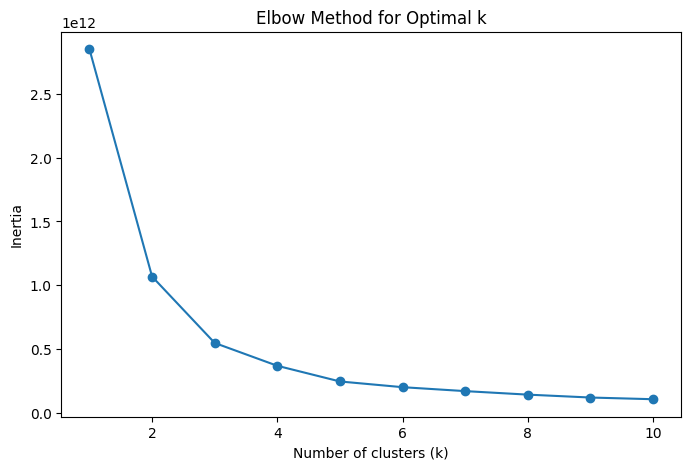

In [ ]:
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
optimal_k = 3  # Adjust this value based on your elbow plot

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

# Fit the KMeans model to the data
kmeans.fit(df2)

# Predict the clusters for each data point
clusters = kmeans.predict(df2)

# Add the cluster labels to the dataset
df2_clustered = df2.copy()
df2_clustered['Cluster'] = clusters

In [ ]:
df2_clustered['Cluster'].unique()

array([1, 0, 2], dtype=int32)

In [ ]:
# Save the clustered dataset to a CSV file
df2_clustered.to_csv('k-means_clustered_dataset.csv', index=False)

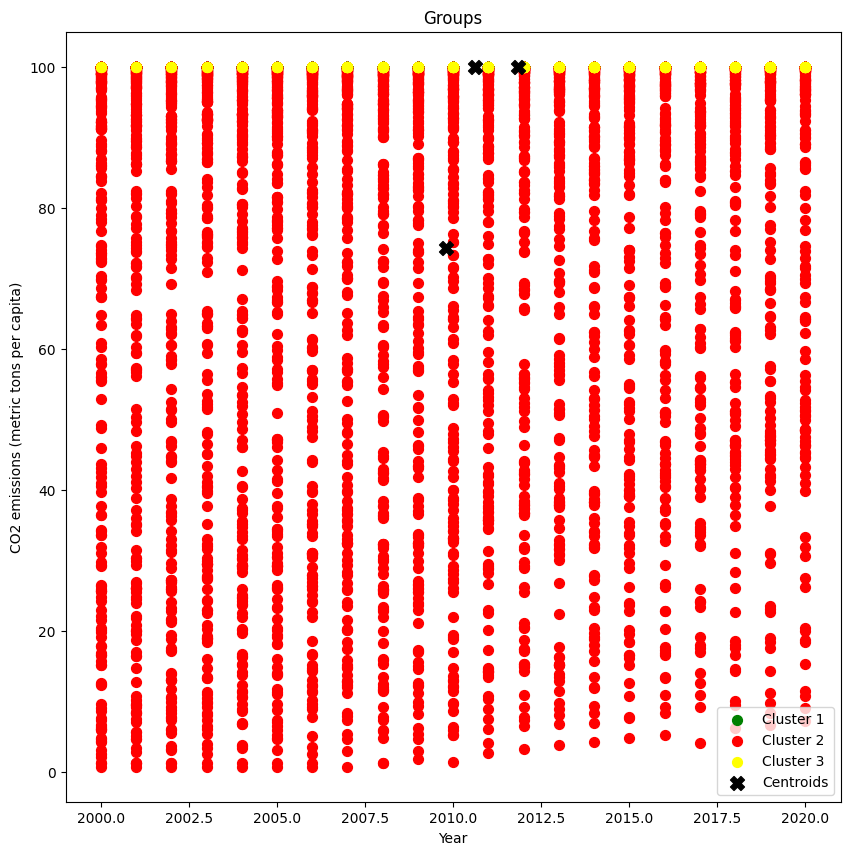

In [ ]:
# Visualize the clustered data
plt.figure(figsize=(10, 10))
colors = ['green', 'red', 'yellow', 'purple', 'orange', 'blue', 'pink', 'brown', 'grey', 'cyan']

for cluster in range(optimal_k):
    plt.scatter(df2.values[clusters == cluster, 0], df2.values[clusters == cluster, 1],
                s=50, c=colors[cluster], label=f'Cluster {cluster + 1}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='black', marker='X', label='Centroids')

plt.title('Groups')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.legend()
plt.show()

##k-medoids

In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.5 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # K-medoids requires at least 2 clusters

for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(df2)
    inertia.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(df2, kmedoids.labels_))


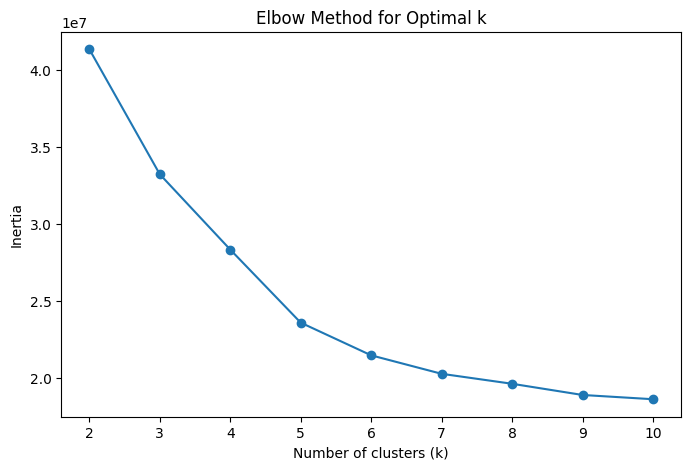

In [ ]:
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

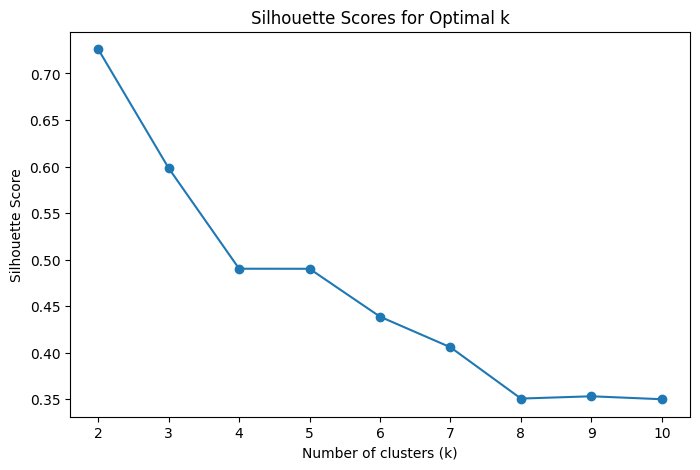

In [ ]:
# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')
plt.show()

In [ ]:
# Optimal number of clusters
optimal_k_2= 2

# Initialize KMedoids with the optimal number of clusters
kmedoids = KMedoids(n_clusters=optimal_k_2, random_state=42)

# Fit the KMedoids model to the data
kmedoids.fit(df2)

# Predict the clusters for each data point
clusters_1 = kmedoids.predict(df2)

# Add the cluster labels to the dataset
df2_clustered_1 = df2.copy()
df2_clustered_1['Cluster'] = clusters_1

In [ ]:
df2_clustered_1['Cluster'].unique()

array([0, 1])

In [ ]:
print(clusters_1)

[0 0 0 ... 0 0 0]


In [ ]:
df2_clustered_1['Cluster'].value_counts()

Cluster
0    4391
1    1195
Name: count, dtype: int64

In [ ]:
# Save the clustered dataset to a CSV file
df2_clustered_1.to_csv('k-medoids_clustered_dataset.csv', index=False)

##DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

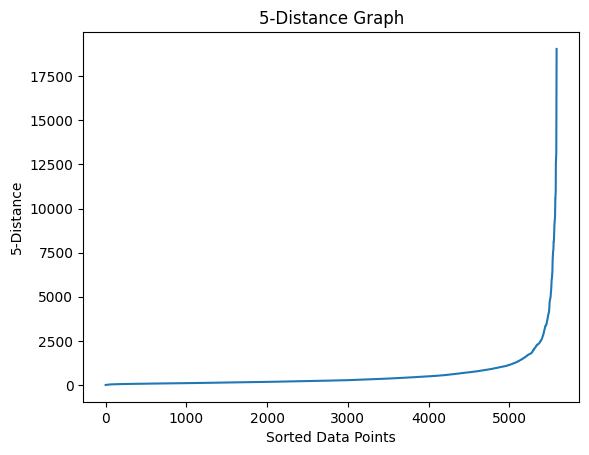

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Assuming df2 is your dataset (replace with your actual dataset loading code if needed)
# Example: df2 = pd.read_csv('your_dataset.csv')

# Compute the k-distance graph
min_samples = 5  # Choose an appropriate value for min_samples
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(df2)
distances, _ = nbrs.kneighbors(df2)
distances = np.sort(distances[:, -1])  # Sort by distance to the k-th nearest neighbor

# Plot the k-distance graph
plt.plot(np.arange(len(df2)), distances)
plt.xlabel('Sorted Data Points')
plt.ylabel(f'{min_samples}-Distance')
plt.title(f'{min_samples}-Distance Graph')
plt.show()


In [ ]:
# Initialize DBSCAN with chosen parameters (epsilon and min_samples)
epsilon = 15000 # Adjust epsilon (eps) based on your dataset
min_samples = 8  # Adjust min_samples based on your dataset
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit the DBSCAN model to the data
dbscan.fit(df2)

# Extract cluster labels
clusters = dbscan.labels_
# Check cluster labels
unique_labels = np.unique(clusters)
print(f"Cluster labels: {unique_labels}")

Cluster labels: [0 1 2]


In [ ]:
# Add the cluster labels to the original dataframe
df2_clustered_3 = df2.copy()
df2_clustered_3['Cluster'] = clusters
df2_clustered_3.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita),Cluster
0,2000,4.446891,57.945817,43.015907,11.779587,1.852782,1586.591120,985.730004,74.989094,44.99,1.443803,182.174037,0.055167,0
1,2001,9.294527,57.947350,43.015907,11.779587,1.852782,1587.375364,1011.679617,72.811460,45.60,0.742517,182.174037,0.055293,0
2,2002,14.133616,57.939684,43.015907,11.771921,1.852782,1649.718098,1034.410867,79.063971,37.83,6.449321,182.174037,0.066810,0
3,2003,18.971165,58.083805,43.015907,11.916042,1.852782,1738.666619,1010.524231,70.249729,36.66,7.541019,199.643228,0.073005,0
4,2004,23.814182,58.151266,43.015907,11.983503,1.852782,1841.168267,1121.869767,70.890841,44.24,3.933178,221.830531,0.054867,0


In [ ]:
df2_clustered_3['Cluster'].unique()

array([0, 1, 2])

In [ ]:
df2_clustered_3['Cluster'].value_counts()

Cluster
0    5549
2      24
1      13
Name: count, dtype: int64

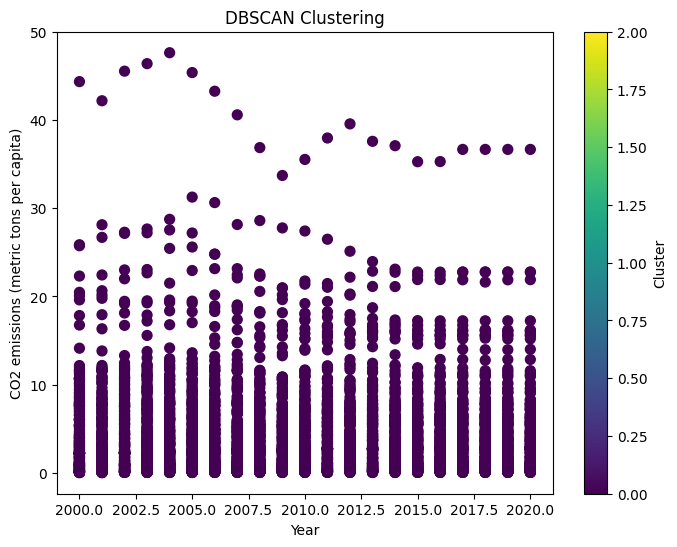

In [ ]:
# Scatter plot of the clustered data points
plt.figure(figsize=(8, 6))
plt.scatter(df2_clustered_3['Year'], df2_clustered_3['CO2 emissions (metric tons per capita)'], c=df2_clustered_3['Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.colorbar(label='Cluster')
plt.show()

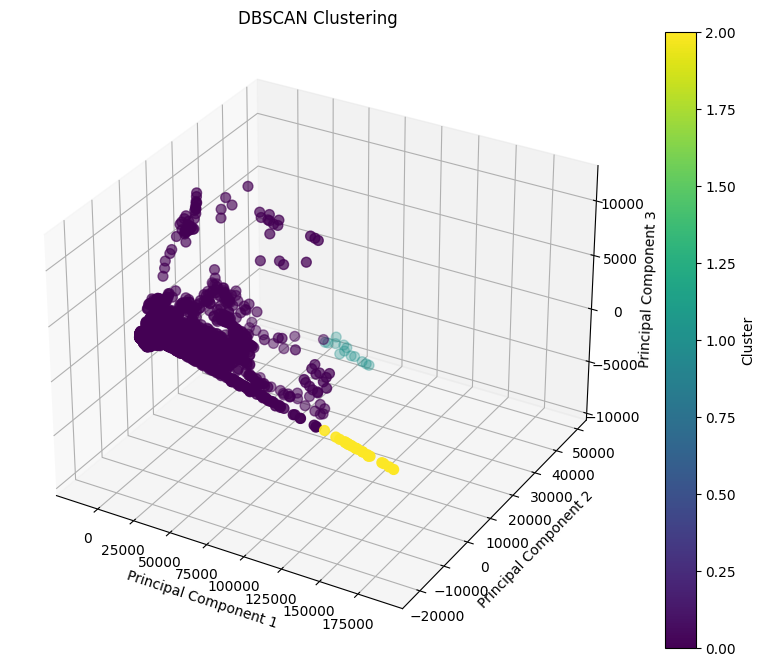

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA for dimensionality reduction
pca = PCA(n_components=3)
components = pca.fit_transform(df2_clustered_3.drop('Cluster', axis=1))  # Drop 'Cluster' column if present

# 3D scatter plot of the clustered data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=df2_clustered_3['Cluster'], cmap='viridis', s=50)
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df2_clustered_3.drop('Cluster', axis=1), df2_clustered_3['Cluster'])

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7147052878524759


In [ ]:
# Save the clustered dataset to a CSV file (optional)
df2_clustered_3.to_csv('DBSCAN_clustered_df2.csv', index=False)

##Hierarchical

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [ ]:
num_clusters = 2
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters)

In [ ]:
# Fit the hierarchical clustering model to the data
clusters = agg_cluster.fit_predict(df2)

# Add the cluster labels to the dataset
df2_clustered_4 = df2.copy()
df2_clustered_4['Cluster'] = clusters

In [ ]:
# Optional: Visualize the dendrogram (hierarchical clustering tree)
# Calculate linkage matrix and plot dendrogram
from scipy.cluster.hierarchy import linkage


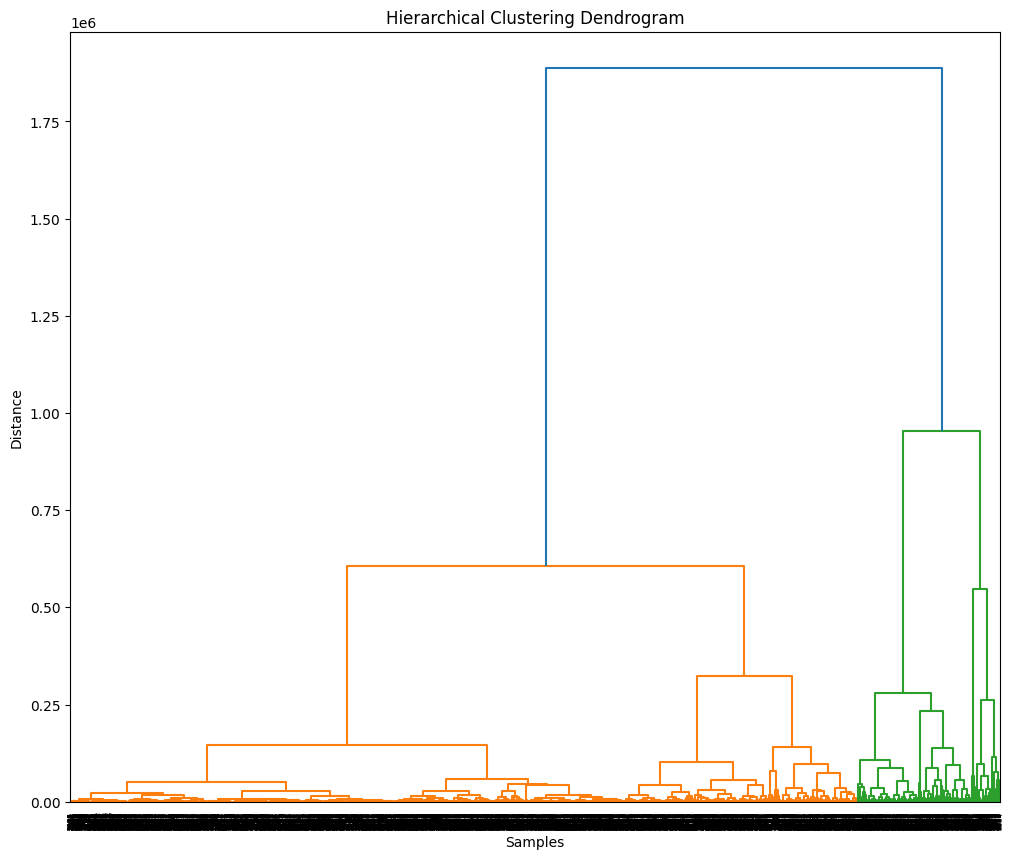

In [ ]:
linkage_matrix = linkage(df2, method='ward')  # You can choose different linkage methods based on your data
plt.figure(figsize=(12, 10))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
df2_clustered_4.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita),Cluster
0,2000,4.446891,57.945817,43.015907,11.779587,1.852782,1586.591120,985.730004,74.989094,44.99,1.443803,182.174037,0.055167,1
1,2001,9.294527,57.947350,43.015907,11.779587,1.852782,1587.375364,1011.679617,72.811460,45.60,0.742517,182.174037,0.055293,1
2,2002,14.133616,57.939684,43.015907,11.771921,1.852782,1649.718098,1034.410867,79.063971,37.83,6.449321,182.174037,0.066810,1
3,2003,18.971165,58.083805,43.015907,11.916042,1.852782,1738.666619,1010.524231,70.249729,36.66,7.541019,199.643228,0.073005,1
4,2004,23.814182,58.151266,43.015907,11.983503,1.852782,1841.168267,1121.869767,70.890841,44.24,3.933178,221.830531,0.054867,1


In [ ]:
df2_clustered_4['Cluster'].unique()

array([1, 0])

In [ ]:
df2_clustered_4['Cluster'].value_counts()

Cluster
1    4733
0     853
Name: count, dtype: int64

In [ ]:
# 3. Calculate and print the silhouette score
silhouette_avg = silhouette_score(df2, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7510477383258932


In [ ]:
# Save the clustered dataset to a CSV file (optional)
df2_clustered_4.to_csv('Hierarchy_clustered_df2.csv', index=False)